In [ ]:
import numpy as np

# Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Utility function for feature extraction

In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

# Getting the total number of available classes and creating lables by using dictionary (For Masked data) 

In [ ]:
celebrity_file_name_dict_masked = {}

import os
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Duplicates/Duplicates/50SamplesUnmasked_masked/"
for folder in os.listdir(dataset_path):
  celebrity_file_name_dict_masked[folder] = []
  folder_path = dataset_path+folder+'/'
  for file_name in os.listdir(folder_path):
    file_path = folder_path+file_name
    celebrity_file_name_dict_masked[folder].append(file_path)
#for images in celebrity_file_name_dict_masked.keys():
  #print(celebrity_file_name_dict_masked[images])

In [ ]:
class_dict_masked = {}
count = 0
for celebrity_name in celebrity_file_name_dict_masked.keys():
    class_dict_masked[celebrity_name] = count
    count = count + 1
len(class_dict_masked)

44

# Getting the total number of available classes and creating lables by using dictionary (For unmasked data)

In [ ]:
celebrity_file_name_dict_unmasked = {}

import os
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Duplicates/Duplicates/50SamplesUnmasked/"
for folder in os.listdir(dataset_path):
  celebrity_file_name_dict_unmasked[folder] = []
  folder_path = dataset_path+folder+'/'
  for file_name in os.listdir(folder_path):
    file_path = folder_path+file_name
    celebrity_file_name_dict_unmasked[folder].append(file_path)
#for images in celebrity_file_name_dict.keys():
  #print(celebrity_file_name_dict[images])

In [ ]:
class_dict_unmasked = {}
count = 0
for celebrity_name in celebrity_file_name_dict_unmasked.keys():
    class_dict_unmasked[celebrity_name] = count
    count = count + 1
len(class_dict_unmasked)

45

# Unmasked Training X_unmasked and y_unmasked

In [ ]:
from tqdm import tqdm
X_unmasked, y_unmasked = [], []
X_unmasked_half, y_unmasked_half = [], []
for celebrity_name, training_files in tqdm(celebrity_file_name_dict_unmasked.items()):
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X_unmasked.append(combined_img)
        y_unmasked.append(class_dict_unmasked[celebrity_name])


        #Partial features
        xs = scalled_raw_img.shape[0]//2  # division lines for the picture
        ys = scalled_raw_img.shape[1]//2
        scalled_raw_img_half = scalled_raw_img[0:xs, 0:]
        xs = scalled_img_har.shape[0]//2  # division lines for the picture
        ys = scalled_img_har.shape[1]//2
        scalled_img_har_half = scalled_img_har[0:xs, 0:]
        combined_img_half = np.vstack((scalled_raw_img_half.reshape(xs*32*3,1),scalled_img_har_half.reshape(xs*32,1)))
        X_unmasked_half.append(combined_img_half)
        y_unmasked_half.append(class_dict_unmasked[celebrity_name])   

100%|██████████| 45/45 [21:46<00:00, 29.04s/it]


In [ ]:
X_unmasked = np.array(X_unmasked).reshape(len(X_unmasked),len(X_unmasked[0])).astype(float)
print(X_unmasked.shape)

X_unmasked_half = np.array(X_unmasked_half).reshape(len(X_unmasked_half),len(X_unmasked_half[0])).astype(float)
print(X_unmasked_half.shape)


(3688, 4096)
(3688, 2048)


# Masked Training X_masked and y_masked

In [ ]:
from tqdm import tqdm
X_masked, y_masked = [], []
X_masked_half, y_masked_half = [], []
for celebrity_name, training_files in tqdm(celebrity_file_name_dict_masked.items()):
    for training_image in training_files:
        img = cv2.imread(training_image)

        #complete features
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X_masked.append(combined_img)
        y_masked.append(class_dict_masked[celebrity_name])

        #Partial features
        xs = scalled_raw_img.shape[0]//2  # division lines for the picture
        ys = scalled_raw_img.shape[1]//2
        scalled_raw_img_half = scalled_raw_img[0:xs, 0:]
        xs = scalled_img_har.shape[0]//2  # division lines for the picture
        ys = scalled_img_har.shape[1]//2
        scalled_img_har_half = scalled_img_har[0:xs, 0:]
        combined_img_half = np.vstack((scalled_raw_img_half.reshape(xs*32*3,1),scalled_img_har_half.reshape(xs*32,1)))
        X_masked_half.append(combined_img_half)
        y_masked_half.append(class_dict_masked[celebrity_name])   

100%|██████████| 44/44 [20:18<00:00, 27.70s/it]


In [ ]:
print(len(X_masked[0]))

4096


In [ ]:
len(X_masked)

3637

In [ ]:
X_masked = np.array(X_masked).reshape(len(X_masked),len(X_masked[0])).astype(float)
print(X_masked.shape)

X_masked_half = np.array(X_masked_half).reshape(len(X_masked_half),len(X_masked_half[0])).astype(float)
print(X_masked_half.shape)

(3637, 4096)
(3637, 2048)


# Splitting, training and testing of unmasked-unmasked data

In [ ]:
from sklearn.model_selection import train_test_split
X_unmasked_train_DT, X_unmasked_test_DT, y_unmasked_train_DT, y_unmasked_test_DT = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN, X_unmasked_test_KNN, y_unmasked_train_KNN, y_unmasked_test_KNN = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM, X_unmasked_test_SVM, y_unmasked_train_SVM, y_unmasked_test_SVM = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_RF, X_unmasked_test_RF, y_unmasked_train_RF, y_unmasked_test_RF = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_NB, X_unmasked_test_NB, y_unmasked_train_NB, y_unmasked_test_NB = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_unmasked_train_DT, y_unmasked_train_DT)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_unmasked_train_KNN, y_unmasked_train_KNN)

#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_unmasked_train_SVM, y_unmasked_train_SVM)

#Naive-Bayees
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_unmasked_train_NB = sc.fit_transform(X_unmasked_train_NB)
X_unmasked_test_NB = sc.transform(X_unmasked_test_NB)

from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_unmasked_train_NB, y_unmasked_train_NB)

#Random forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_unmasked_train_RF, y_unmasked_train_RF)


#predictions
y_unmasked_pred_DT = classifier_DT.predict(X_unmasked_test_DT)
#y_test_DT = y_test_DT.tolist() 

y_unmasked_pred_SVM = classifier_SVM.predict(X_unmasked_test_SVM)
#y_test_SVM = y_test_SVM.tolist() 

y_unmasked_pred_RF = classifier_RF.predict(X_unmasked_test_RF)
#y_test_RF = y_test_RF.tolist() 

y_unmasked_pred_NB = classifier_NB.predict(X_unmasked_test_NB)
#y_test_NB = y_test_NB.tolist() 

y_unmasked_pred_KNN = classifier_KNN.predict(X_unmasked_test_KNN)
#y_test_KNN = y_test_KNN.tolist() 


y_unmasked_test_np_DT = np.asarray(y_unmasked_test_DT)
y_unmasked_test_np_SVM = np.asarray(y_unmasked_test_SVM)
y_unmasked_test_np_RF = np.asarray(y_unmasked_test_RF)
y_unmasked_test_np_KNN = np.asarray(y_unmasked_test_KNN)
y_unmasked_test_np_NB = np.asarray(y_unmasked_test_NB)

# Accuracy
##############################################
disc_unmasked_NB = y_unmasked_test_np_NB - y_unmasked_pred_NB

count = 0
for i in disc_unmasked_NB:
  if i == 0:
    count += 1

accuracy_unmasked_NB = ( (100 * count) / len(y_unmasked_pred_NB))
##############################################
disc_unmasked_RF = y_unmasked_test_np_RF - y_unmasked_pred_RF

count = 0
for i in disc_unmasked_RF:
  if i == 0:
    count += 1

accuracy_unmasked_RF = ( (100 * count) / len(y_unmasked_pred_RF))
##############################################
disc_unmasked_KNN = y_unmasked_test_np_KNN - y_unmasked_pred_KNN

count = 0
for i in disc_unmasked_KNN:
  if i == 0:
    count += 1

accuracy_unmasked_KNN = ( (100 * count) / len(y_unmasked_pred_KNN))
##############################################
disc_unmasked_SVM = y_unmasked_test_np_SVM - y_unmasked_pred_SVM

count = 0
for i in disc_unmasked_SVM:
  if i == 0:
    count += 1

accuracy_unmasked_SVM = ( (100 * count) / len(y_unmasked_pred_SVM))
##############################################
disc_unmasked_DT = y_unmasked_test_np_DT - y_unmasked_pred_DT

count = 0
for i in disc_unmasked_DT:
  if i == 0:
    count += 1

accuracy_unmasked_DT = ( (100 * count) / len(y_unmasked_pred_DT))
##############################################

print(accuracy_unmasked_NB)
print(accuracy_unmasked_RF)
print(accuracy_unmasked_DT)
print(accuracy_unmasked_KNN)
print(accuracy_unmasked_SVM)


32.79132791327913
68.02168021680217
64.49864498644986
30.352303523035232
78.59078590785907


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm_nb = confusion_matrix(y_unmasked_test_np_NB,y_unmasked_pred_NB)
cm_rf = confusion_matrix(y_unmasked_test_np_RF,y_unmasked_pred_RF)
cm_dt = confusion_matrix(y_unmasked_test_np_DT,y_unmasked_pred_DT)
cm_knn = confusion_matrix(y_unmasked_test_np_KNN,y_unmasked_pred_KNN)
cm_svm = confusion_matrix(y_unmasked_test_np_SVM,y_unmasked_pred_SVM)


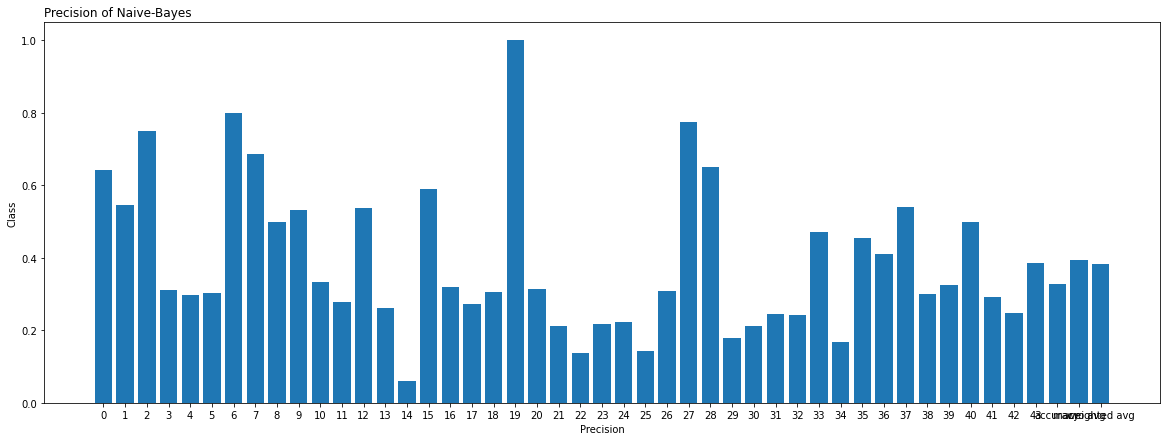

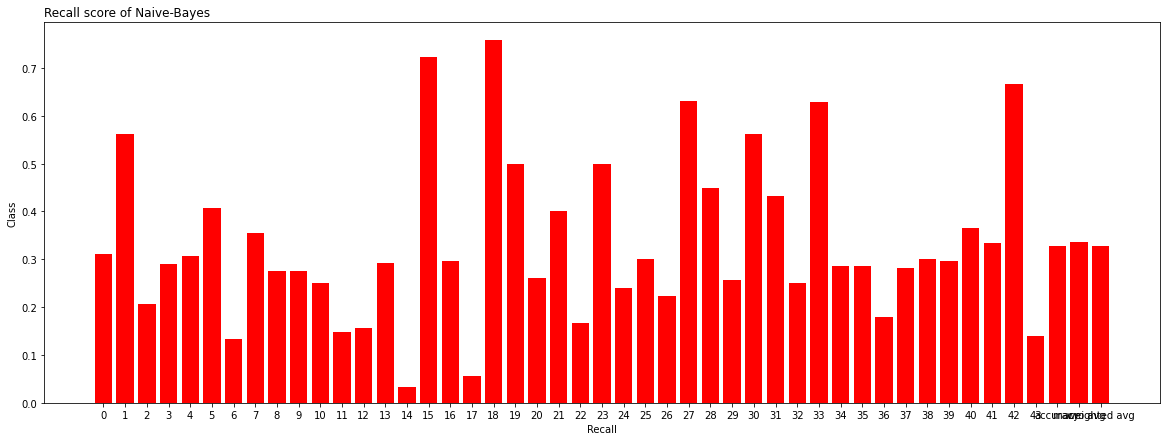

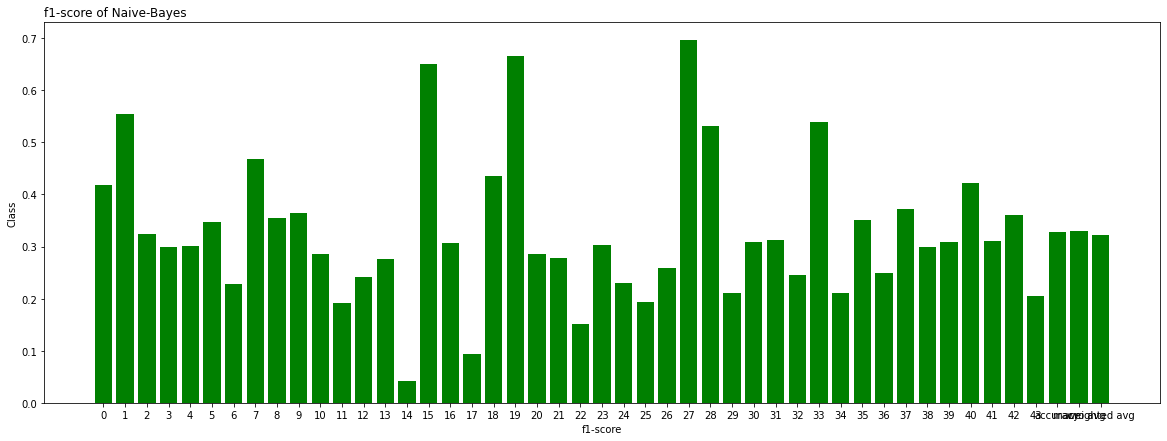

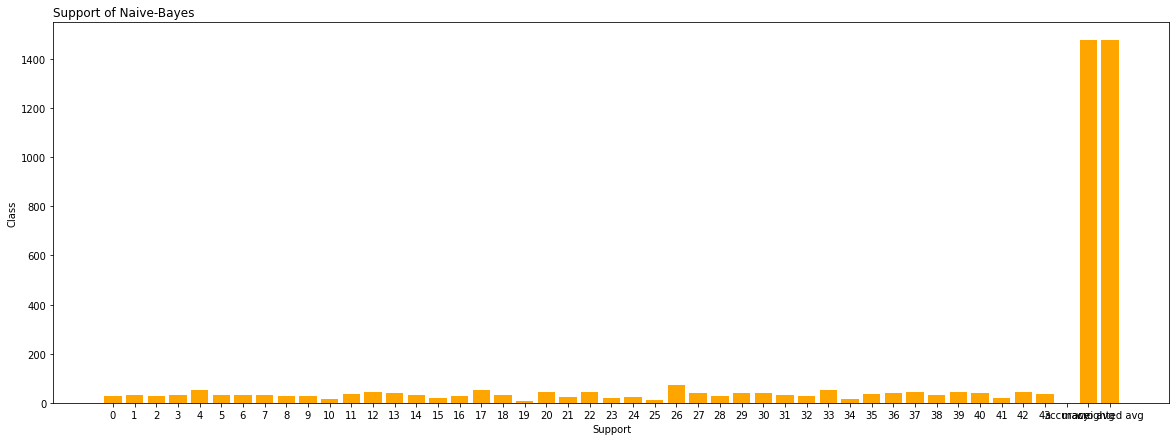

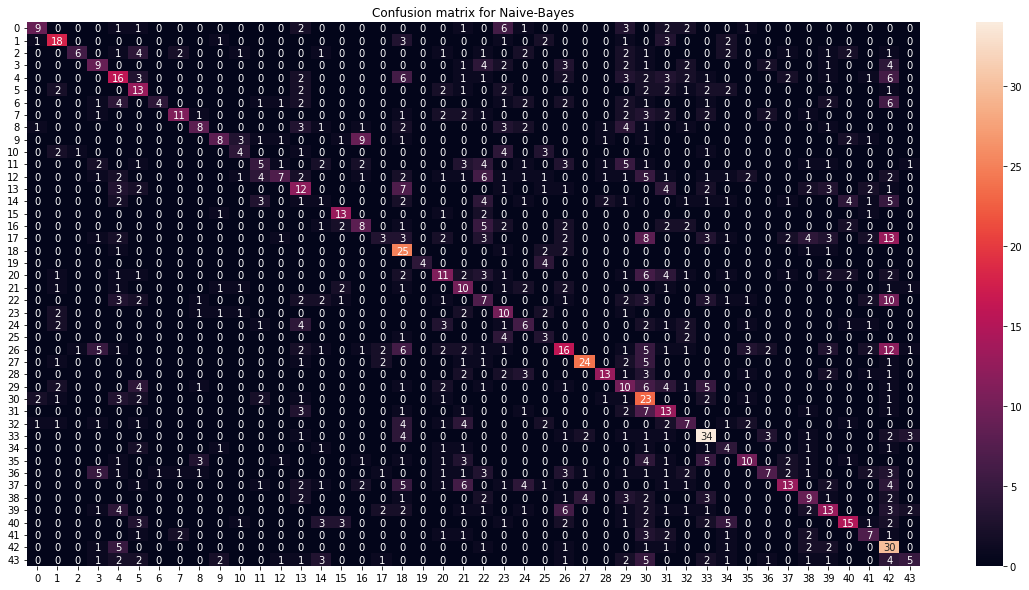

In [ ]:
report = classification_report(y_unmasked_test_np_NB,y_unmasked_pred_NB, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Decision tree
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Naive-Bayes", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Decision tree
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Naive-Bayes", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Naive-Bayes", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Naive-Bayes", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Naive-Bayes")
sns.heatmap(cm_nb, annot=True)
print()
print()
plt.show();

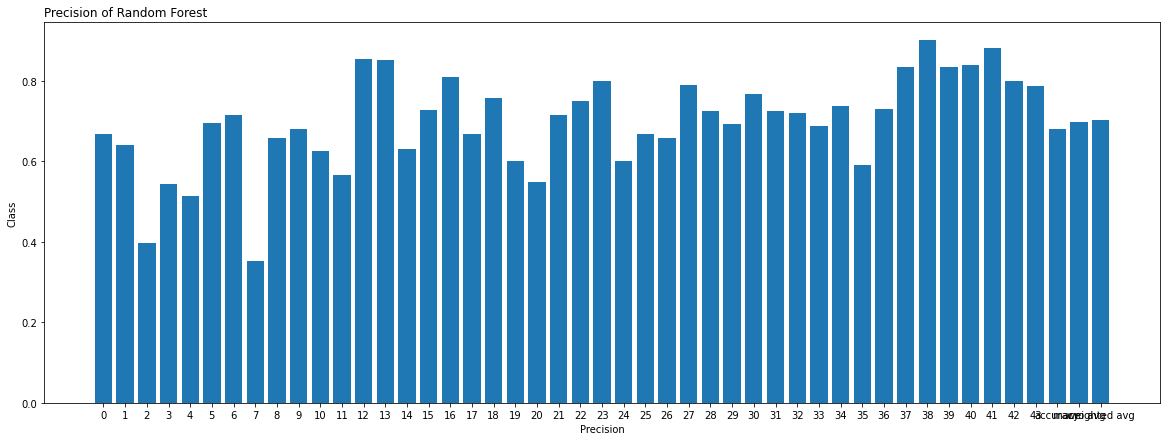

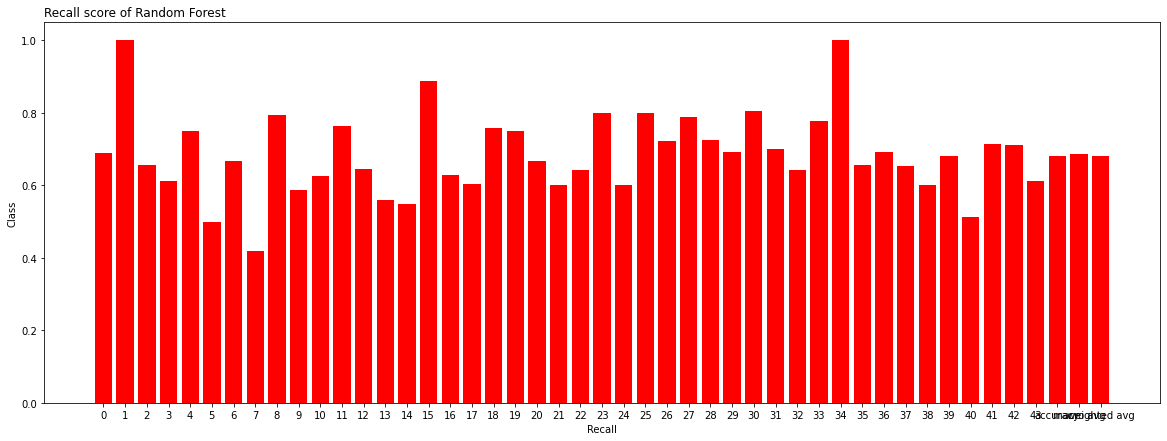

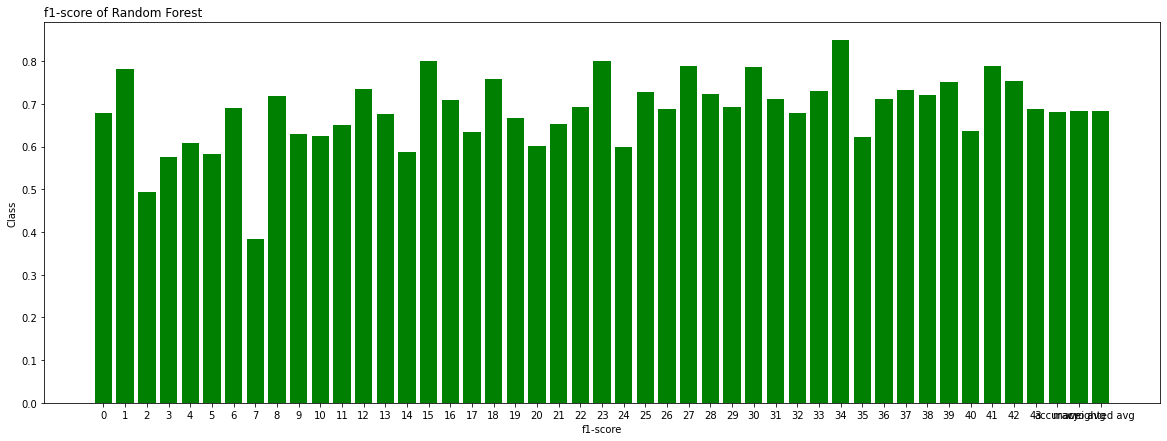

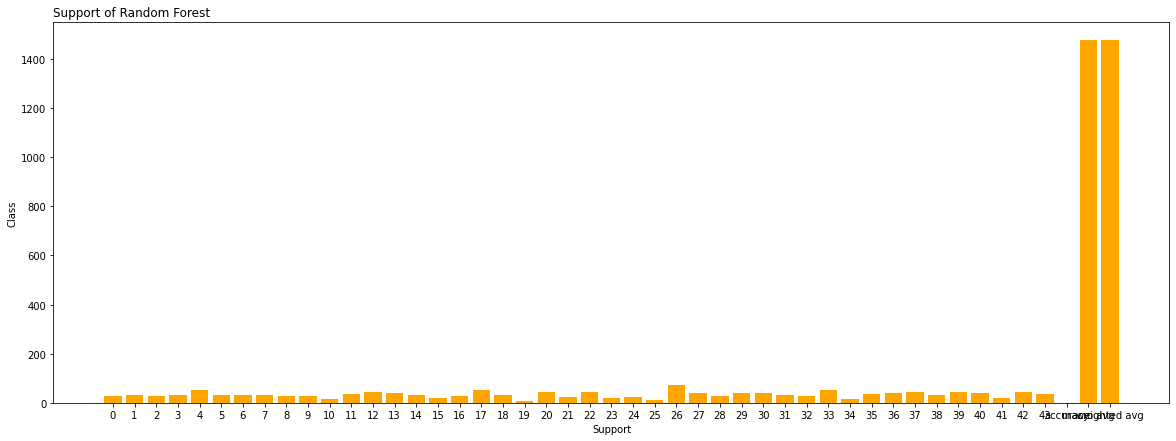

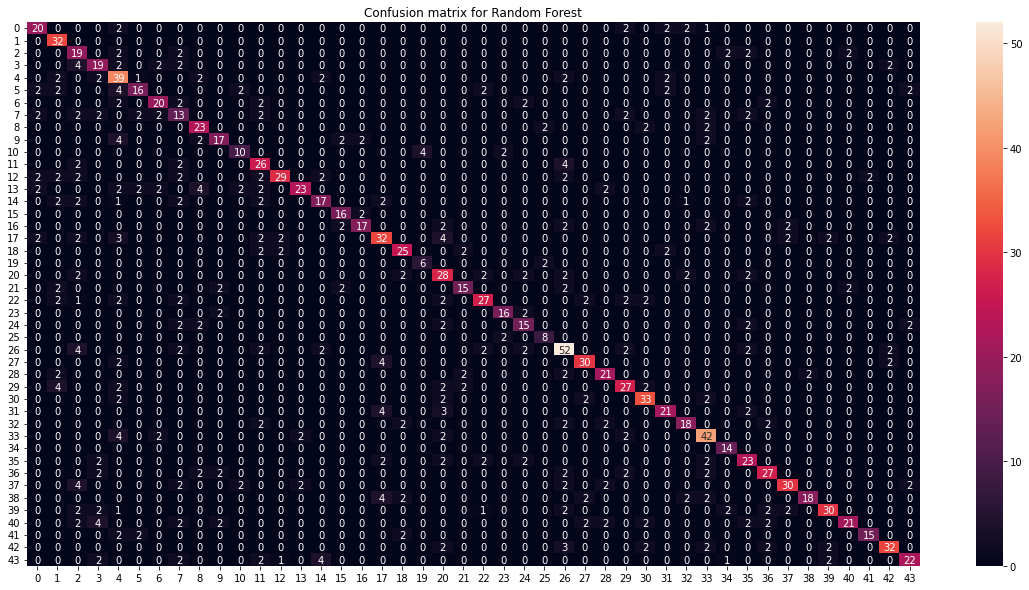

In [ ]:
report = classification_report(y_unmasked_test_np_RF,y_unmasked_pred_RF, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Random Forest", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Random Forest", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Random Forest", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Random Forest", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Random Forest")
sns.heatmap(cm_rf, annot=True)
print()
print()
plt.show();

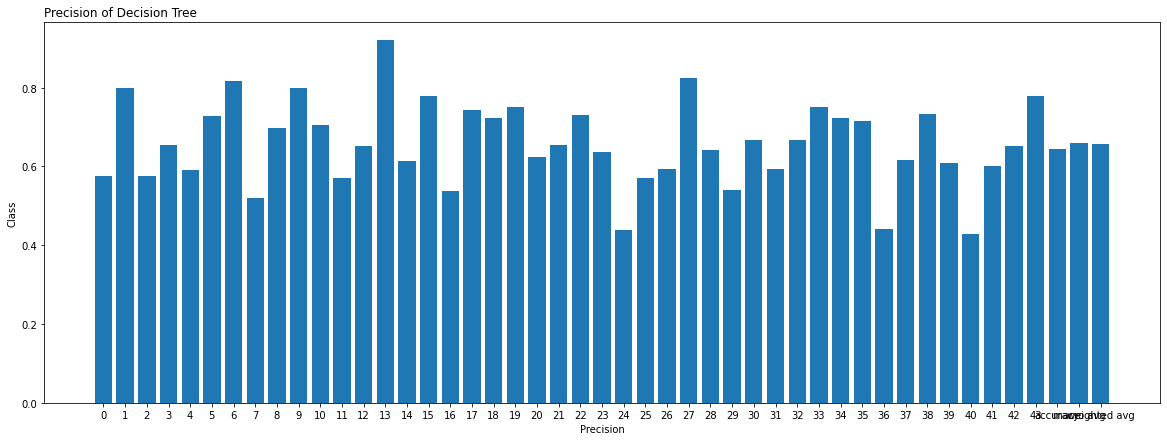

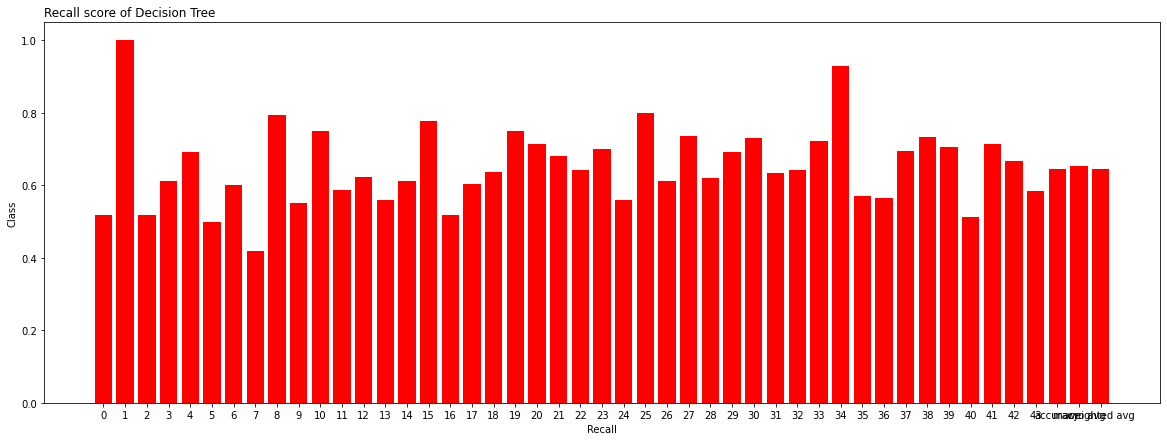

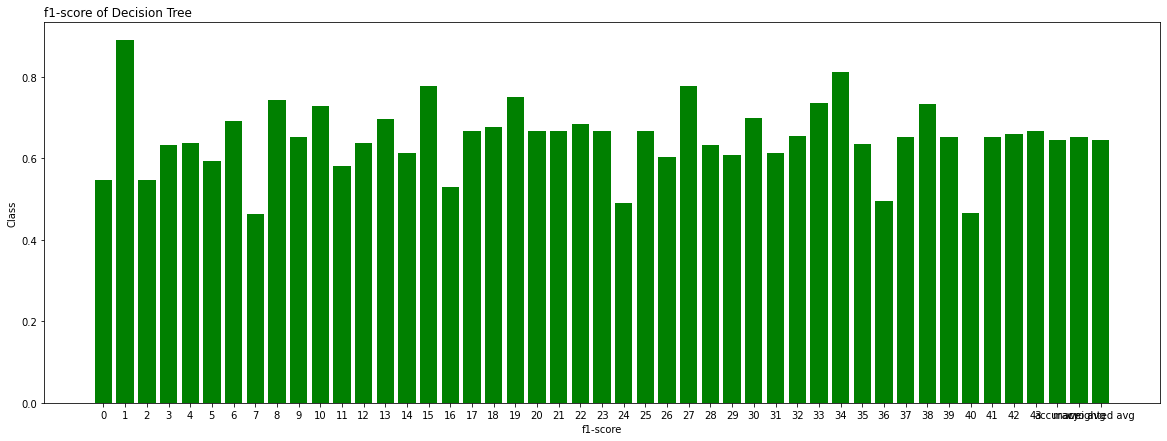

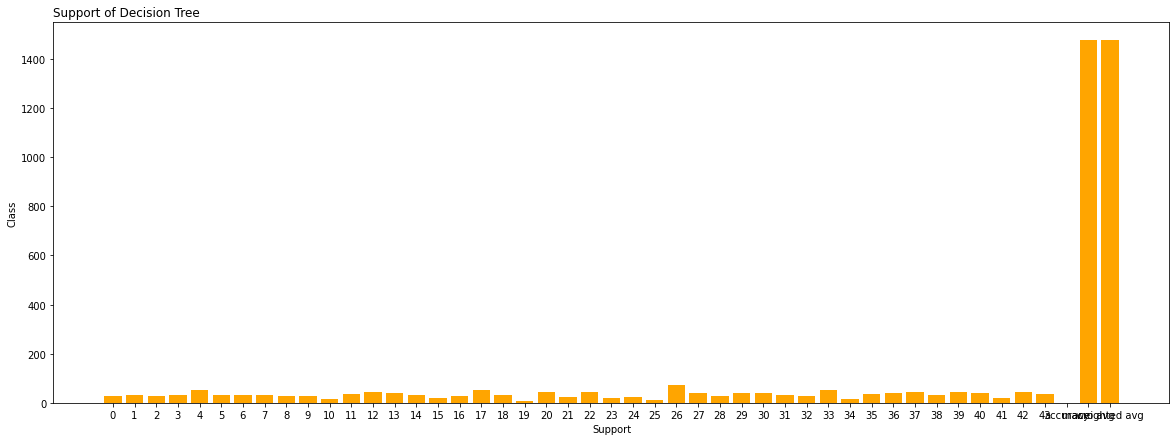

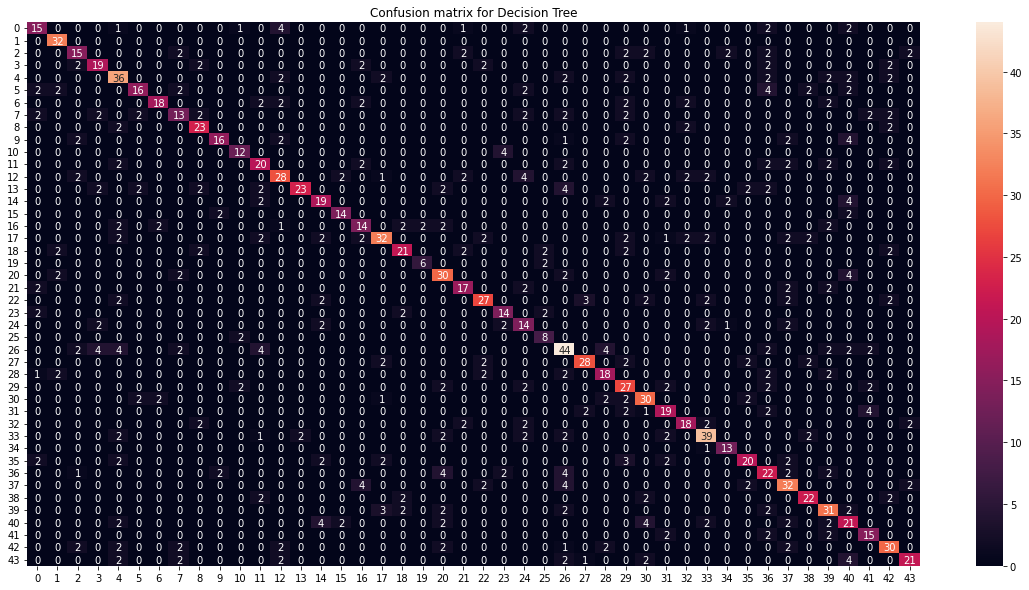

In [ ]:
report = classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Decision Tree", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Decision Tree", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Decision Tree", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Decision Tree", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Decision Tree")
sns.heatmap(cm_dt, annot=True)
print()
print()
plt.show();

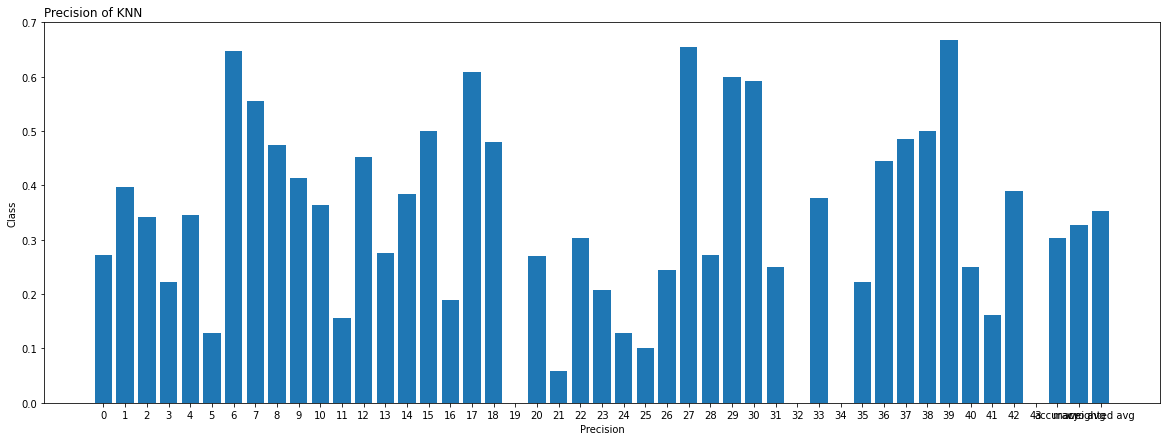

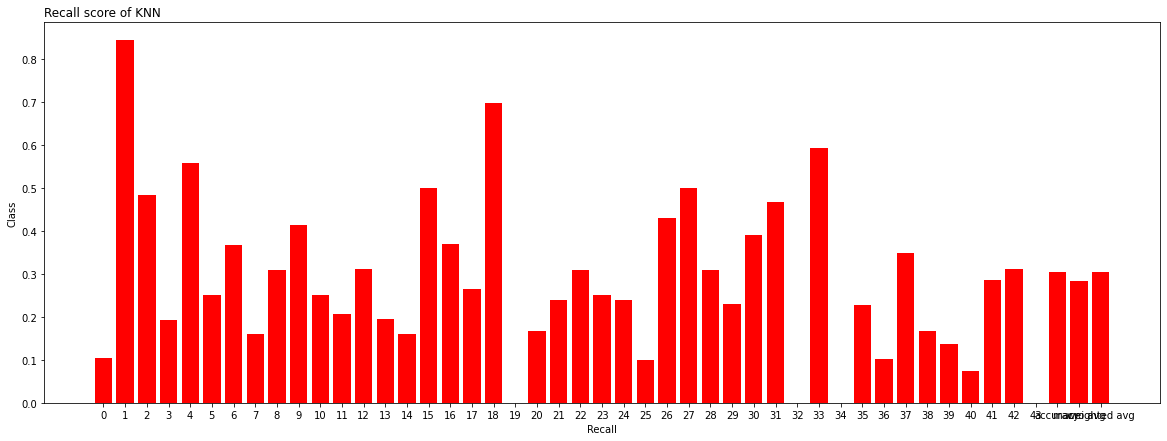

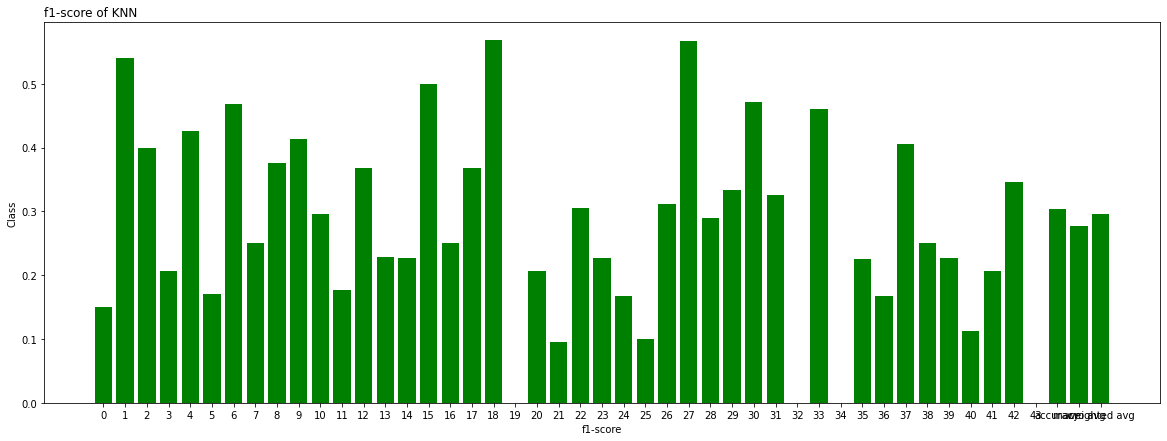

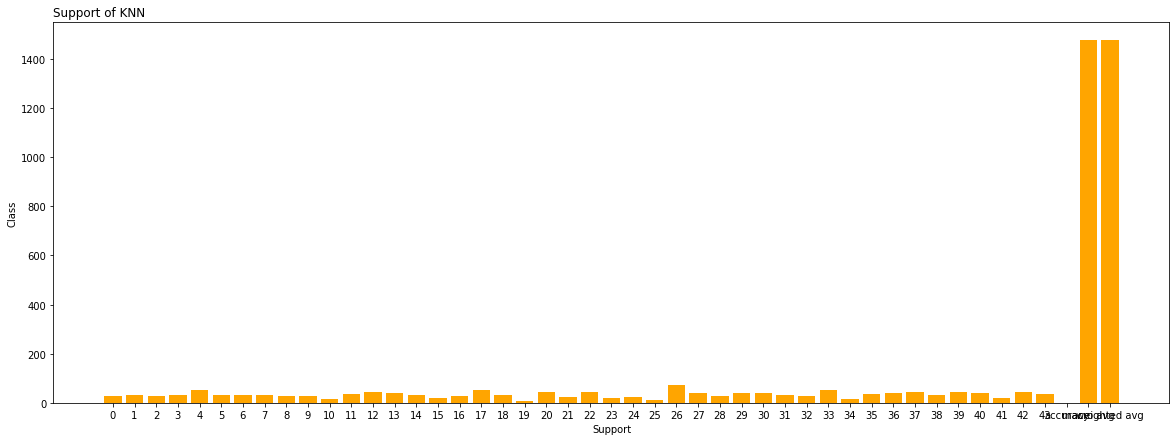

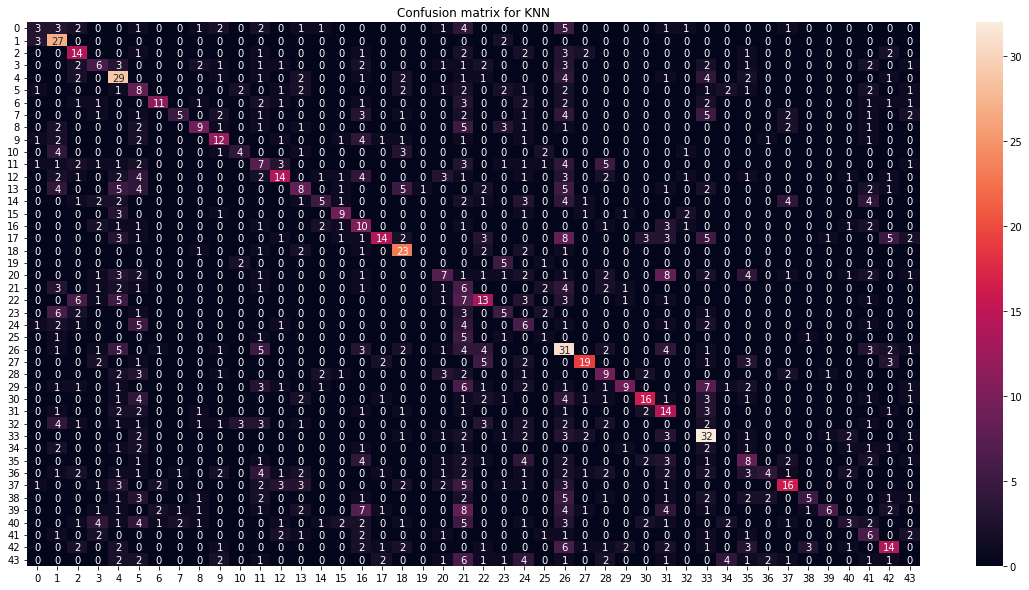

In [ ]:
report = classification_report(y_unmasked_test_np_KNN,y_unmasked_pred_KNN, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of KNN", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of KNN", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of KNN", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of KNN", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for KNN")
sns.heatmap(cm_knn, annot=True)
print()
print()
plt.show();

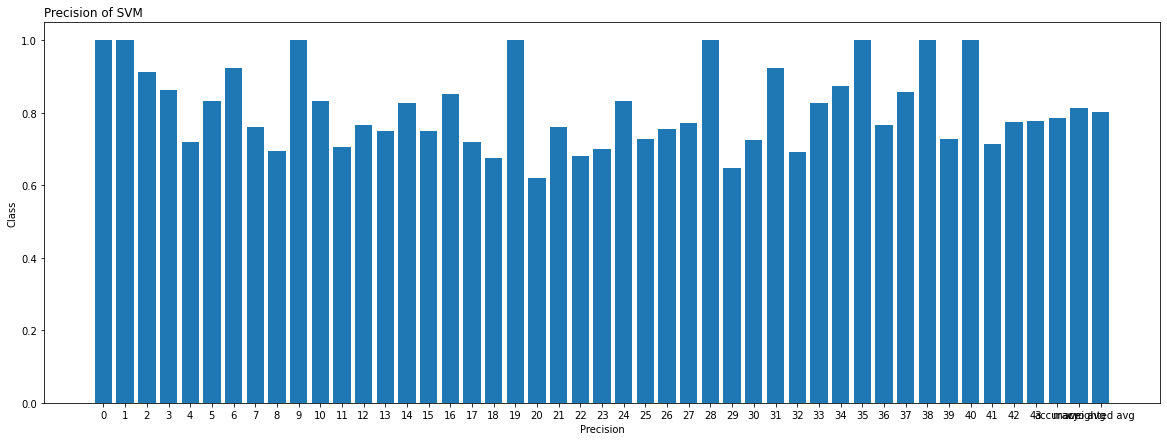

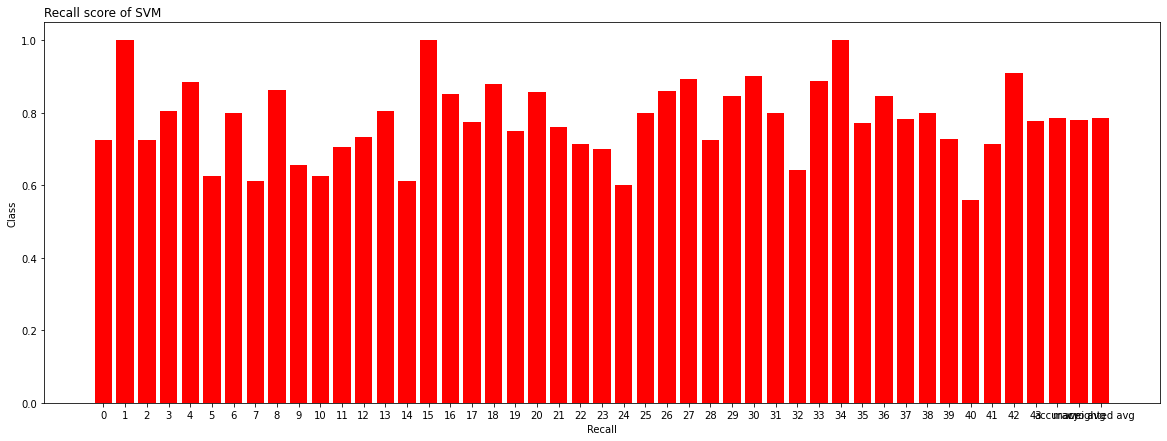

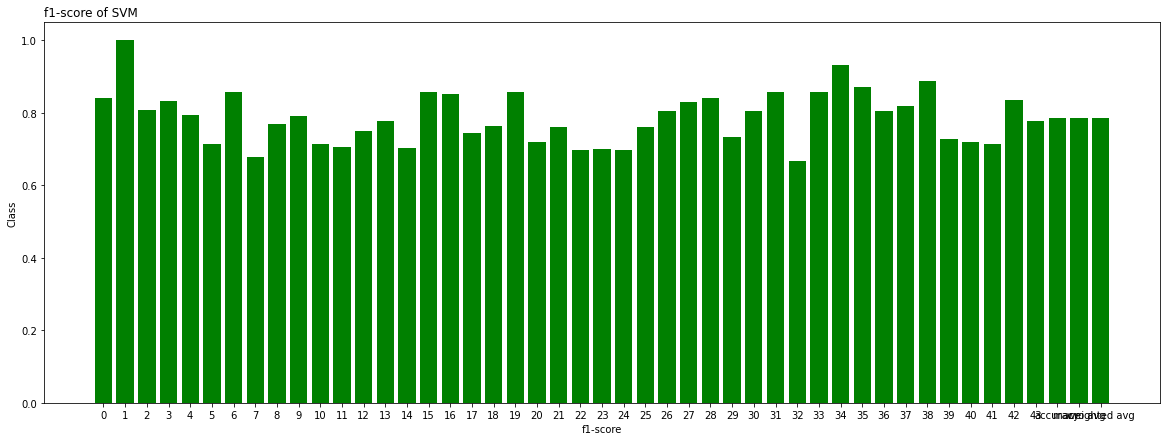

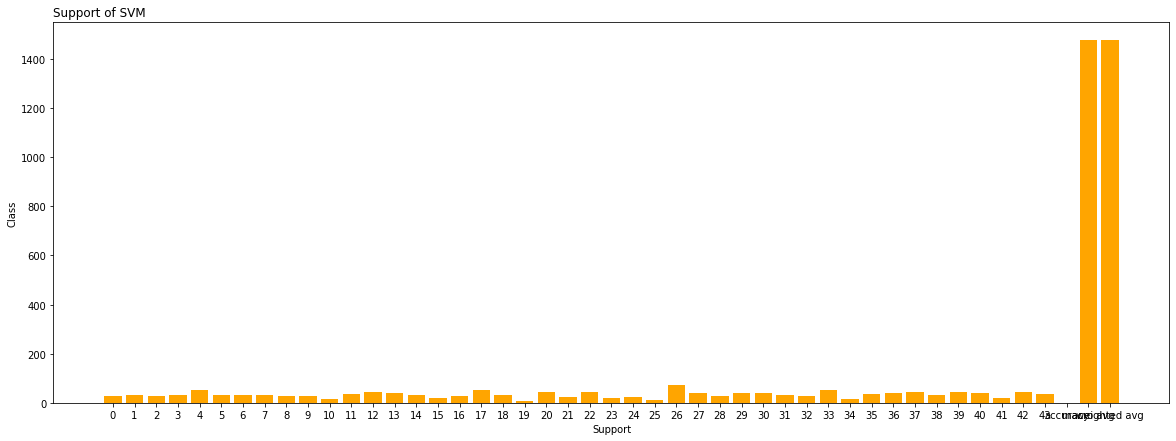

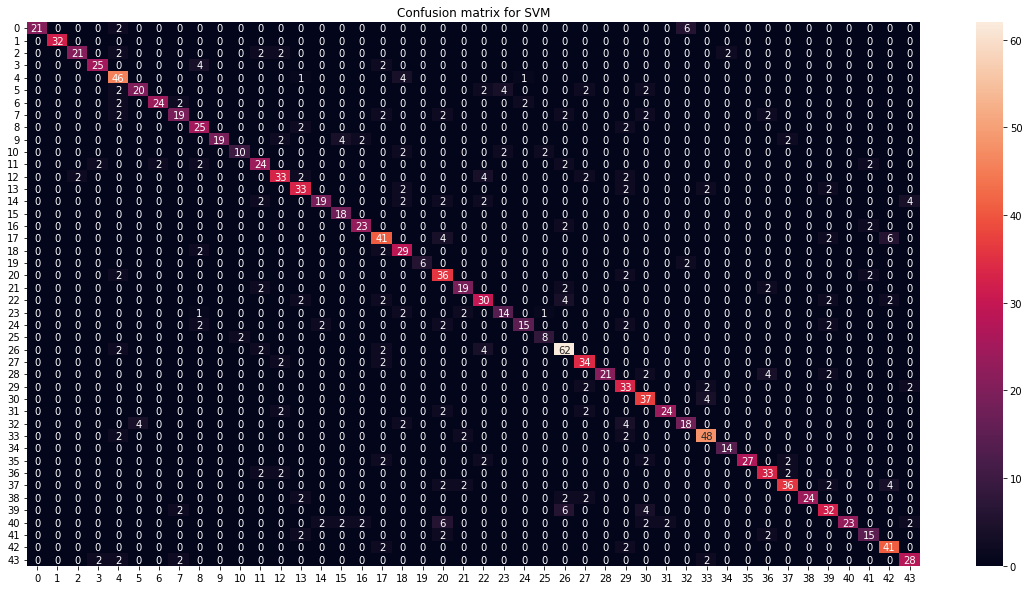

In [ ]:
report = classification_report(y_unmasked_test_np_SVM,y_unmasked_pred_SVM, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_svm, annot=True)
print()
print()
plt.show();

# Splitting, training and testing of masked-masked data

In [ ]:
#Training, splitting testing of masked-masked data

from sklearn.model_selection import train_test_split
X_masked_train_DT, X_masked_test_DT, y_masked_train_DT, y_masked_test_DT = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_masked_train_KNN, X_masked_test_KNN, y_masked_train_KNN, y_masked_test_KNN = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_masked_train_SVM, X_masked_test_SVM, y_masked_train_SVM, y_masked_test_SVM = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_masked_train_RF, X_masked_test_RF, y_masked_train_RF, y_masked_test_RF = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_masked_train_NB, X_masked_test_NB, y_masked_train_NB, y_masked_test_NB = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_masked_train_DT, y_masked_train_DT)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_masked_train_KNN, y_masked_train_KNN)

#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_masked_train_SVM, y_masked_train_SVM)

#Naive Bayees
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_masked_train_NB = sc.fit_transform(X_masked_train_NB)
X_masked_test_NB = sc.transform(X_masked_test_NB)

from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_masked_train_NB, y_masked_train_NB)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_masked_train_RF, y_masked_train_RF)

#Predict Values
y_masked_pred_DT = classifier_DT.predict(X_masked_test_DT)
#y_test_DT = y_test_DT.tolist() 

y_masked_pred_SVM = classifier_SVM.predict(X_masked_test_SVM)
#y_test_SVM = y_test_SVM.tolist() 

y_masked_pred_RF = classifier_RF.predict(X_masked_test_RF)
#y_test_RF = y_test_RF.tolist() 

y_masked_pred_NB = classifier_NB.predict(X_masked_test_NB)
#y_test_NB = y_test_NB.tolist() 

y_masked_pred_KNN = classifier_KNN.predict(X_masked_test_KNN)
#y_test_KNN = y_test_KNN.tolist() 

y_masked_test_np_DT = np.asarray(y_masked_test_DT)
y_masked_test_np_SVM = np.asarray(y_masked_test_SVM)
y_masked_test_np_RF = np.asarray(y_masked_test_RF)
y_masked_test_np_KNN = np.asarray(y_masked_test_KNN)
y_masked_test_np_NB = np.asarray(y_masked_test_NB)


#Accuracy Calculation
# Accuracy
##############################################
disc_masked_NB = y_masked_test_np_NB - y_masked_pred_NB

count = 0
for i in disc_unmasked_NB:
  if i == 0:
    count += 1

accuracy_masked_NB = ( (100 * count) / len(y_masked_pred_NB))
##############################################
disc_masked_RF = y_masked_test_np_RF - y_masked_pred_RF

count = 0
for i in disc_masked_RF:
  if i == 0:
    count += 1

accuracy_masked_RF = ( (100 * count) / len(y_masked_pred_RF))
##############################################
disc_masked_KNN = y_masked_test_np_KNN - y_masked_pred_KNN

count = 0
for i in disc_masked_KNN:
  if i == 0:
    count += 1

accuracy_masked_KNN = ( (100 * count) / len(y_masked_pred_KNN))
##############################################
disc_masked_SVM = y_masked_test_np_SVM - y_masked_pred_SVM

count = 0
for i in disc_masked_SVM:
  if i == 0:
    count += 1

accuracy_masked_SVM = ( (100 * count) / len(y_masked_pred_SVM))
##############################################
disc_masked_DT = y_masked_test_np_DT - y_masked_pred_DT

count = 0
for i in disc_masked_DT:
  if i == 0:
    count += 1

accuracy_masked_DT = ( (100 * count) / len(y_masked_pred_DT))
##############################################

print(accuracy_masked_NB)
print(accuracy_masked_RF)
print(accuracy_masked_DT)
print(accuracy_masked_KNN)
print(accuracy_masked_SVM)

33.264604810996566
65.08591065292096
58.213058419243985
25.9106529209622
72.37113402061856


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm_nb = confusion_matrix(y_masked_test_np_NB,y_masked_pred_NB)
cm_rf = confusion_matrix(y_masked_test_np_RF,y_masked_pred_RF)
cm_dt = confusion_matrix(y_masked_test_np_DT,y_masked_pred_DT)
cm_knn = confusion_matrix(y_masked_test_np_KNN,y_masked_pred_KNN)
cm_svm = confusion_matrix(y_masked_test_np_SVM,y_masked_pred_SVM)

#sns.heatmap(cm_dt, annot=True)
#print(classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT))

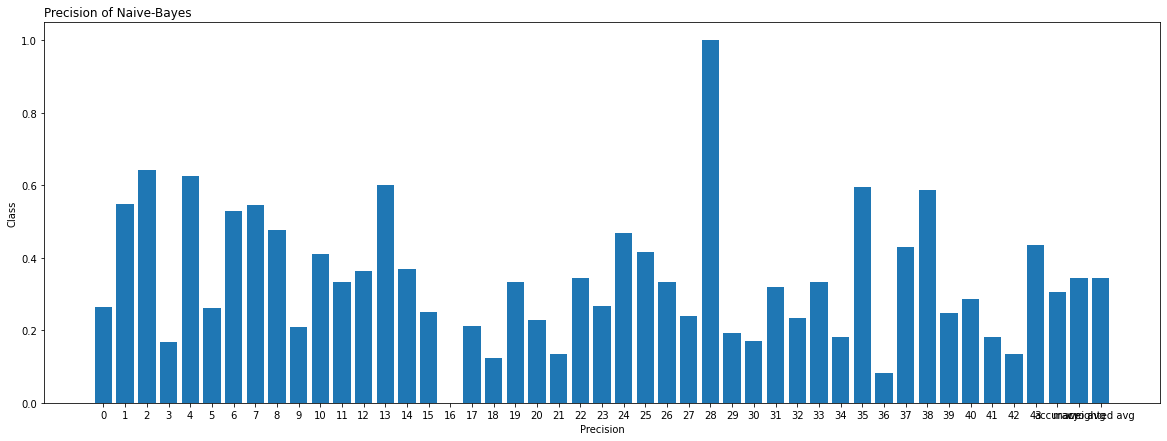

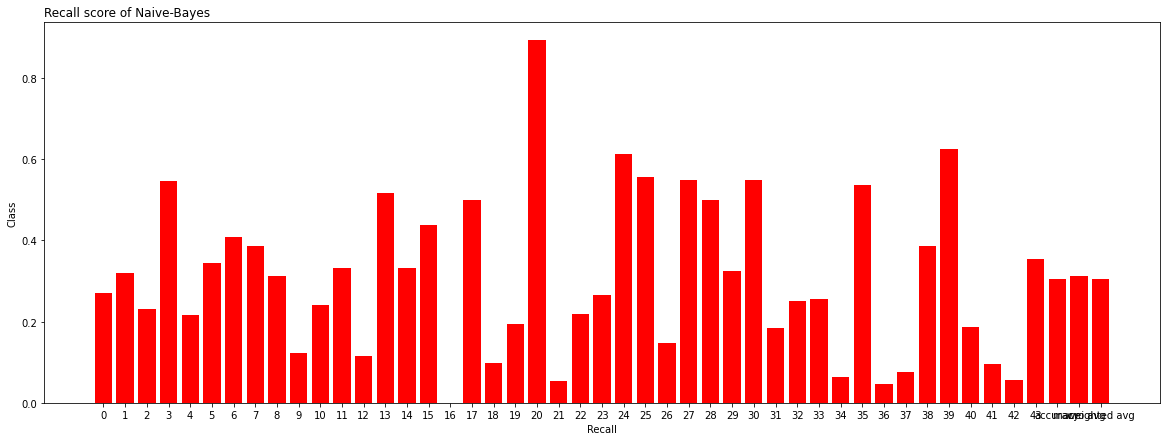

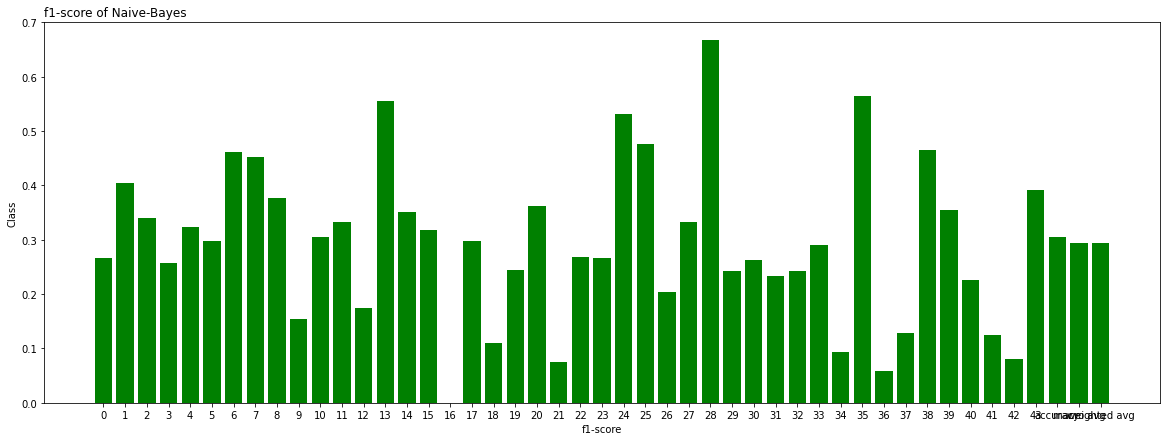

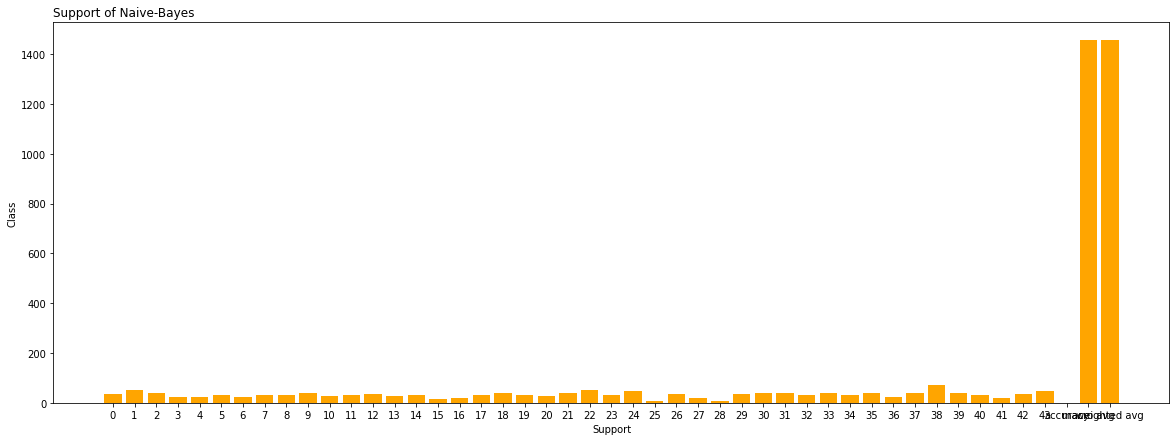

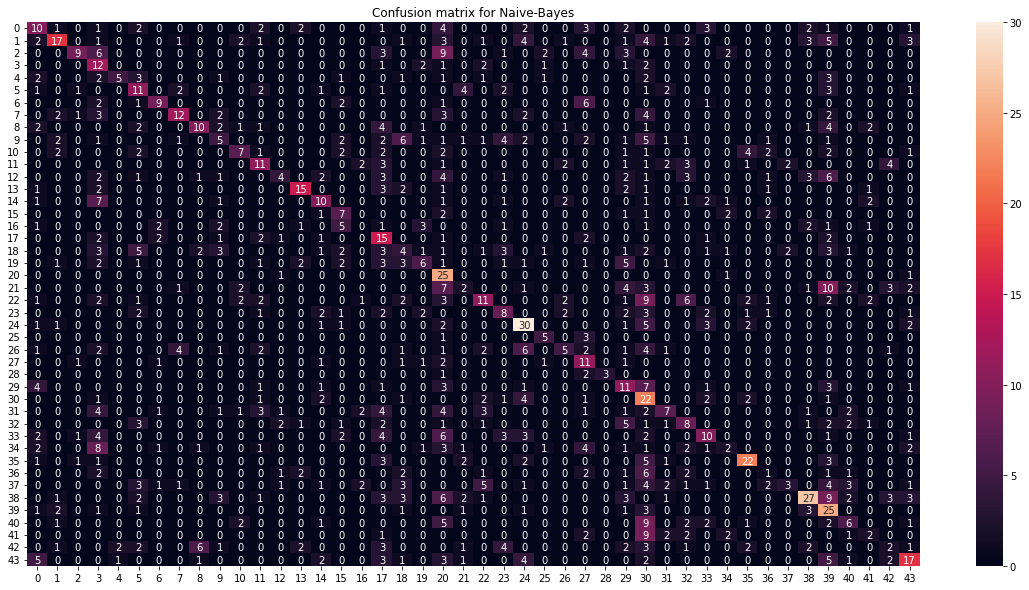

In [ ]:
report = classification_report(y_masked_test_np_NB,y_masked_pred_NB, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Decision tree
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Naive-Bayes", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Decision tree
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Naive-Bayes", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Naive-Bayes", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Naive-Bayes", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Naive-Bayes")
sns.heatmap(cm_nb, annot=True)
print()
print()
plt.show();

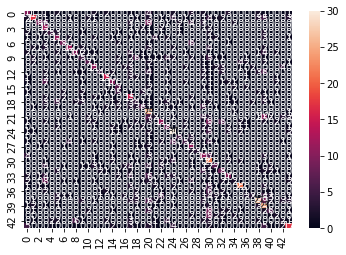

In [ ]:
sns.heatmap(cm_nb, annot=True)

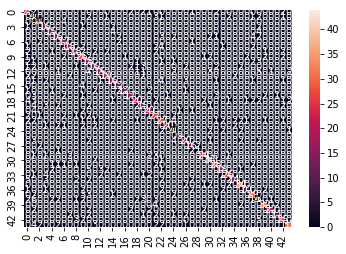

In [ ]:
sns.heatmap(cm_rf, annot=True)

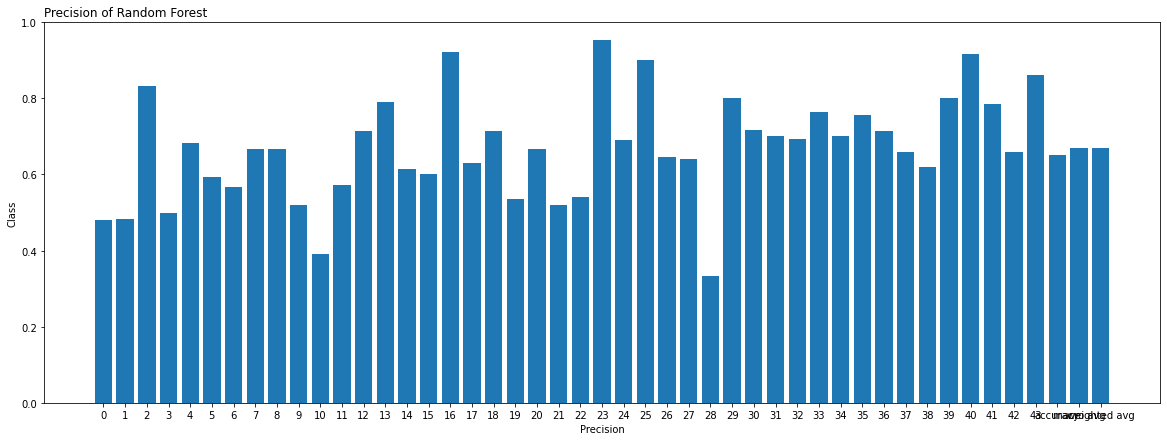

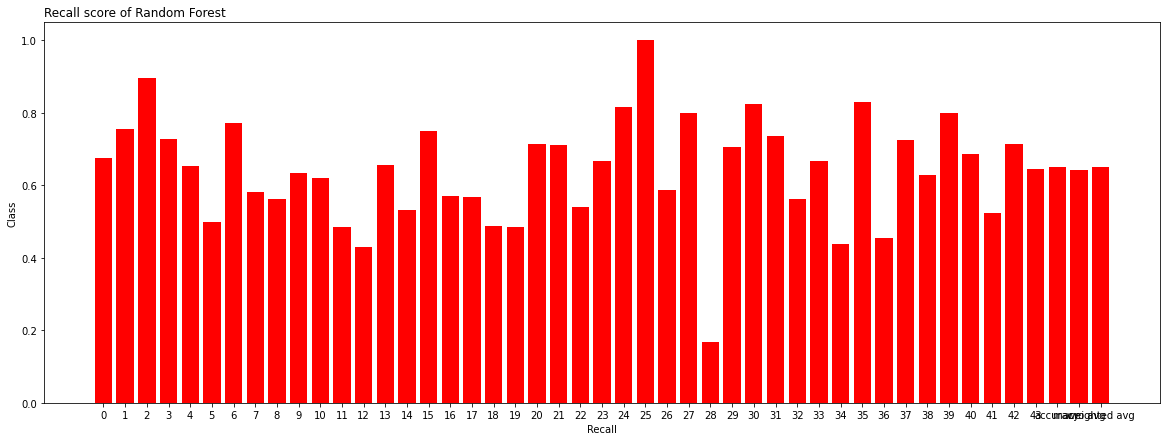

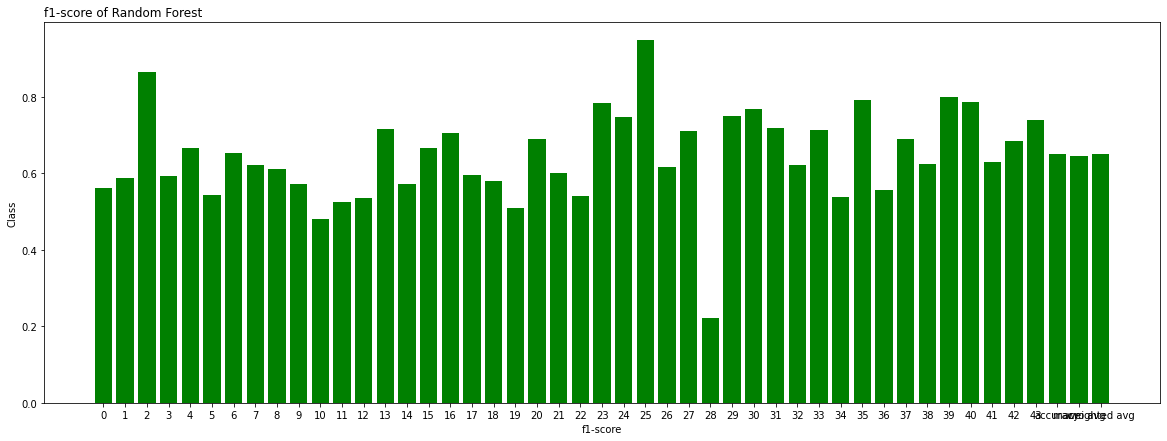

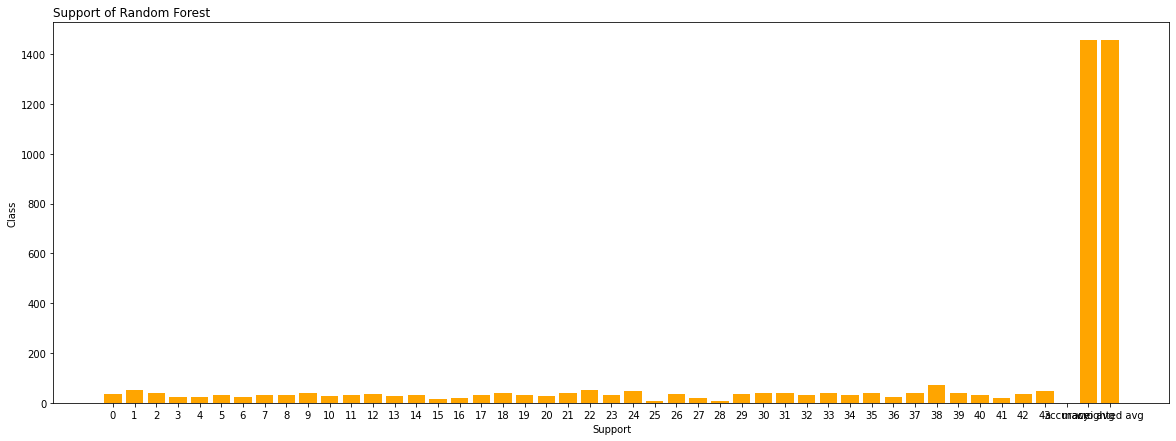

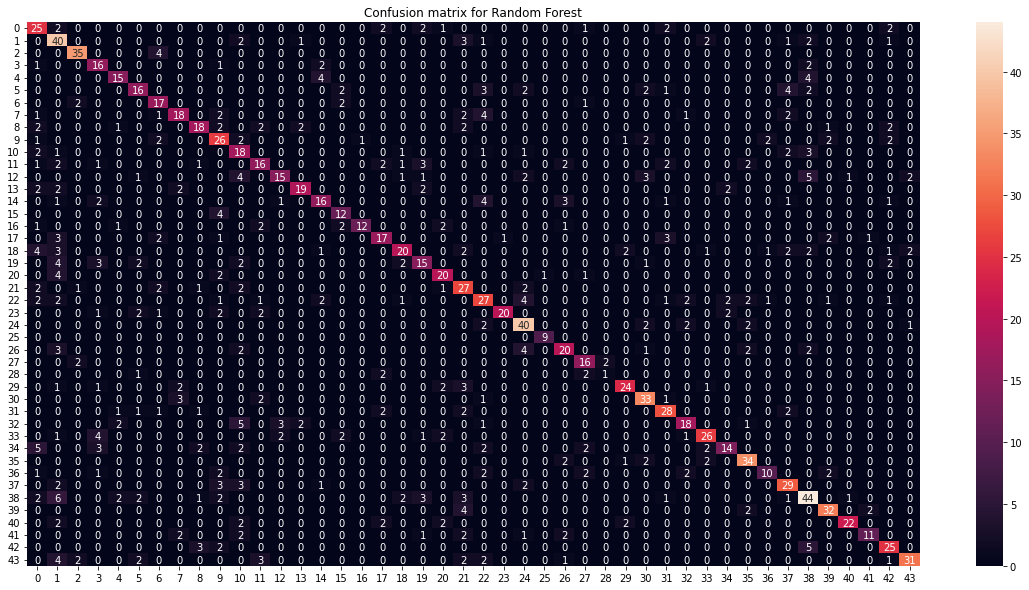

In [ ]:
report = classification_report(y_masked_test_np_RF,y_masked_pred_RF, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Random Forest", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Random Forest", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Random Forest", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Random Forest", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Random Forest")
sns.heatmap(cm_rf, annot=True)
print()
print()
plt.show();

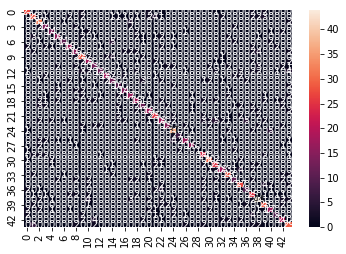

In [ ]:
sns.heatmap(cm_dt, annot=True)

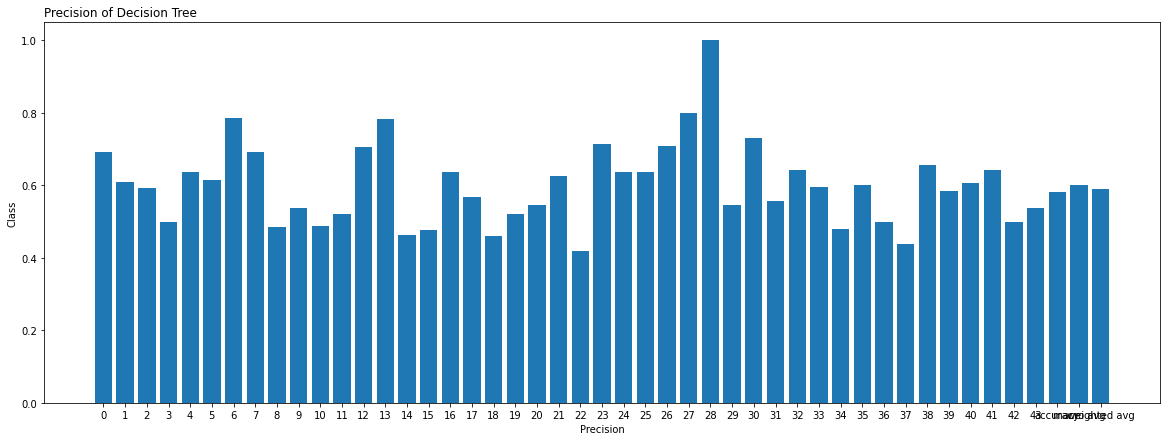

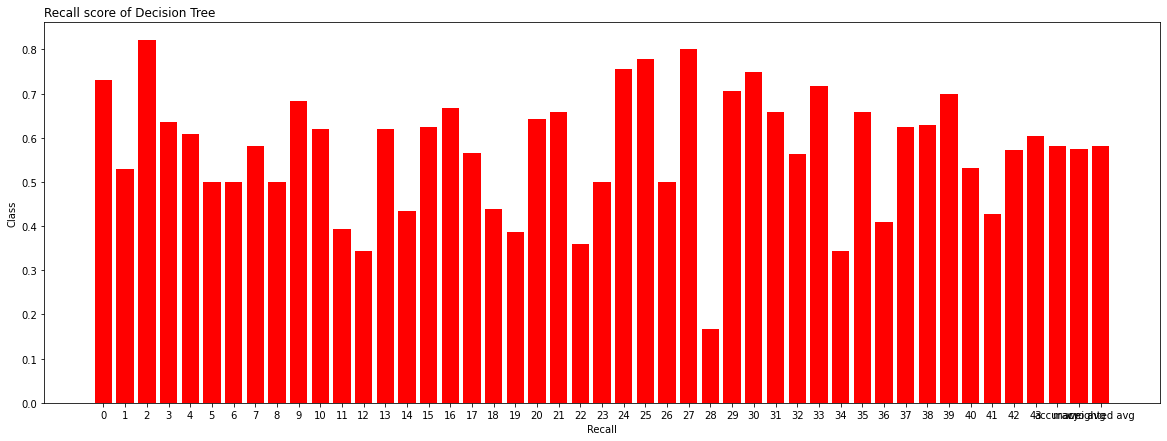

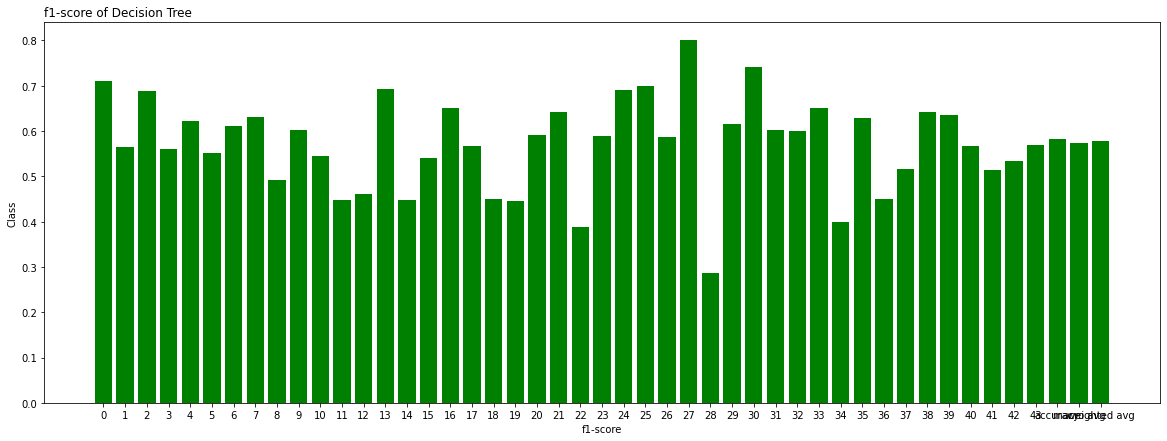

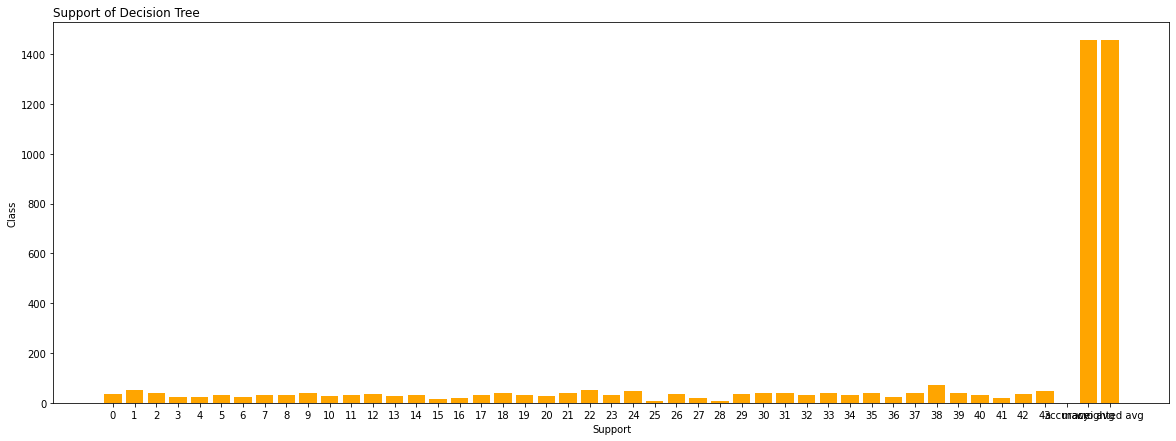

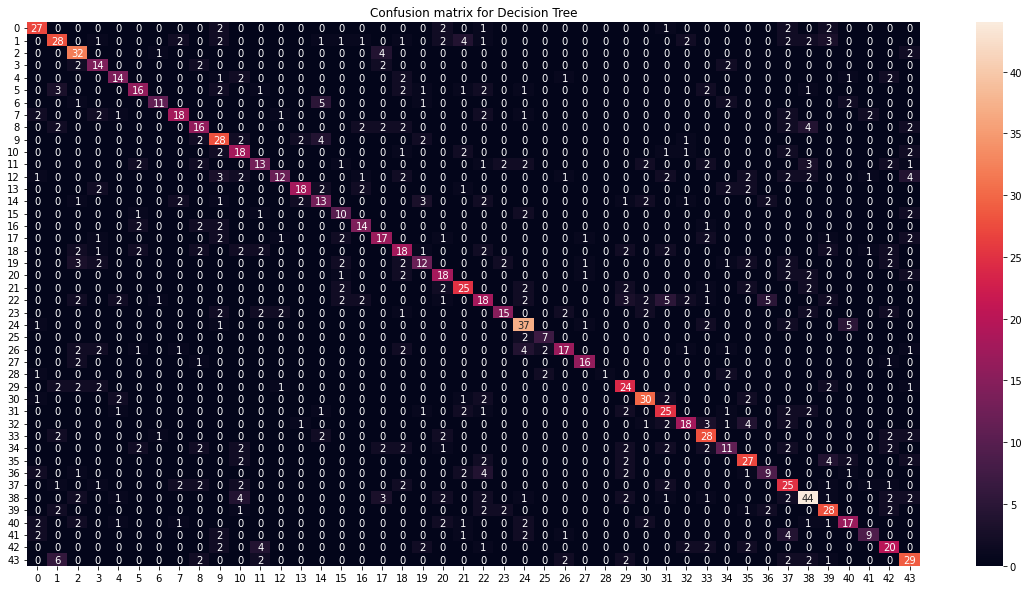

In [ ]:
report = classification_report(y_masked_test_np_DT,y_masked_pred_DT, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Decision Tree", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Decision Tree", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Decision Tree", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Decision Tree", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Decision Tree")
sns.heatmap(cm_dt, annot=True)
print()
print()
plt.show();

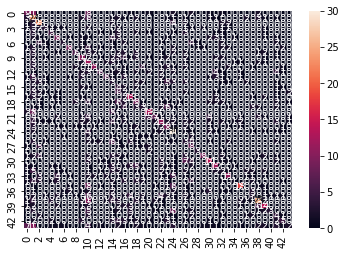

In [ ]:
sns.heatmap(cm_knn, annot=True)

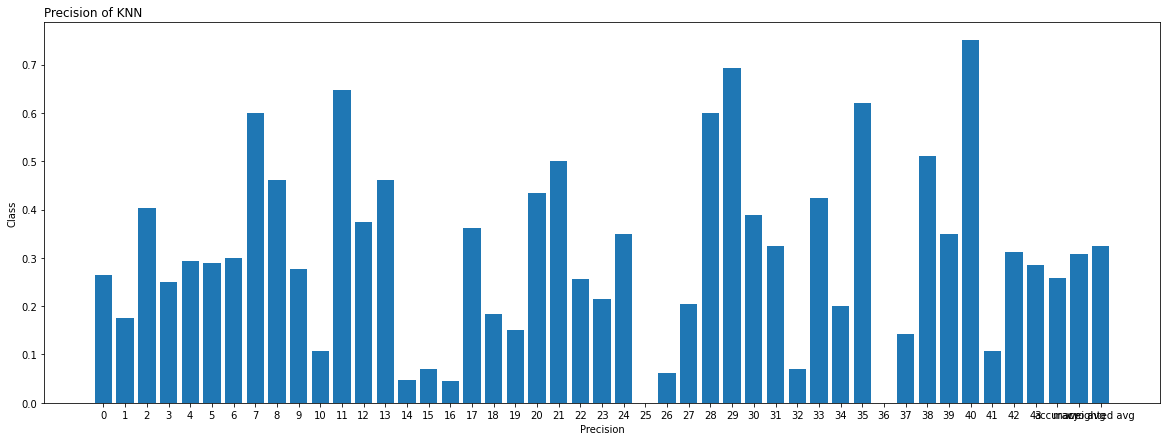

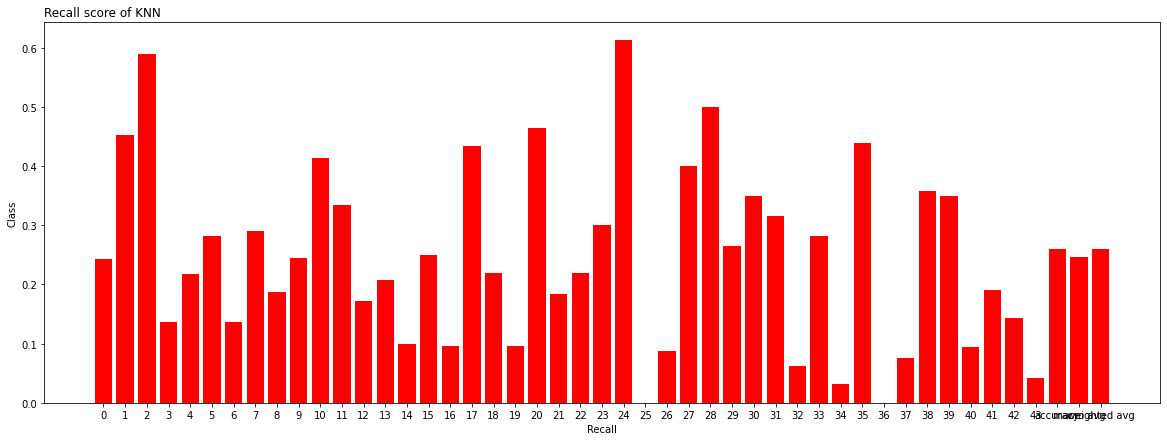

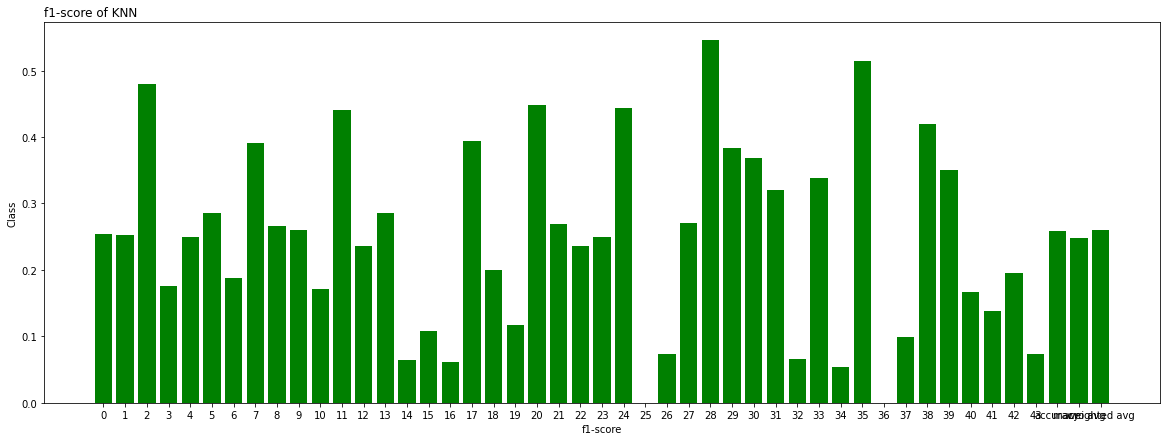

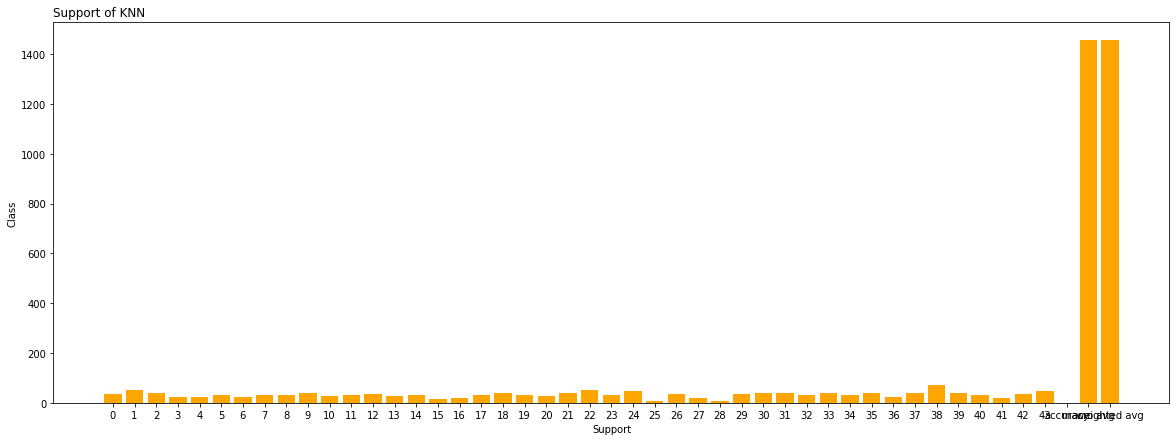

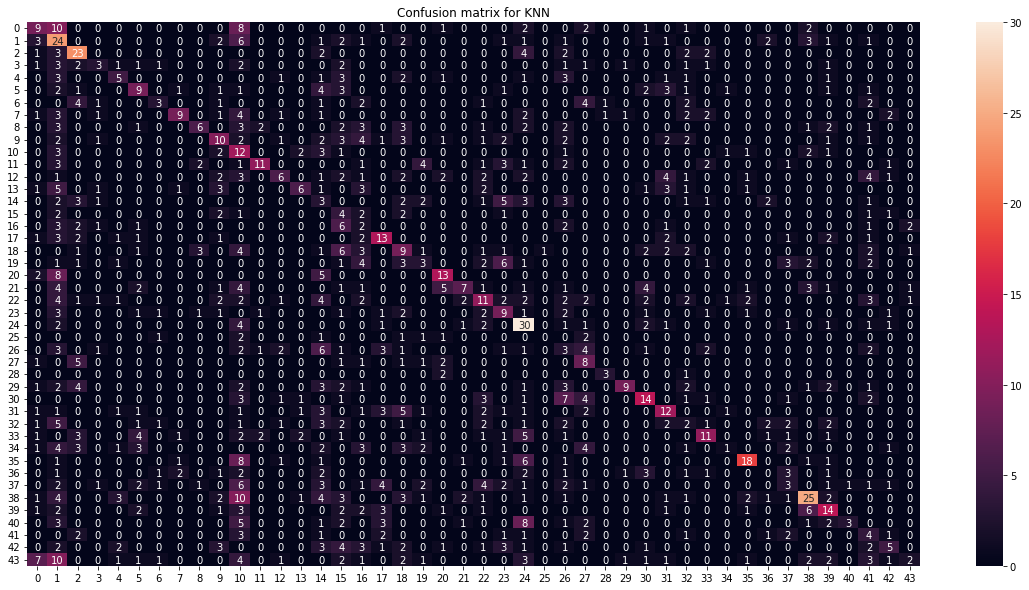

In [ ]:
report = classification_report(y_masked_test_np_KNN,y_masked_pred_KNN, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of KNN", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of KNN", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of KNN", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of KNN", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for KNN")
sns.heatmap(cm_knn, annot=True)
print()
print()
plt.show();

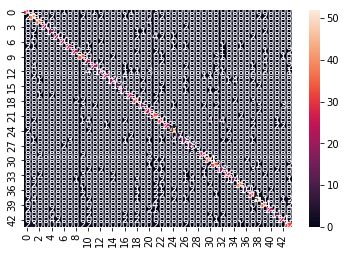

In [ ]:
sns.heatmap(cm_svm, annot=True)

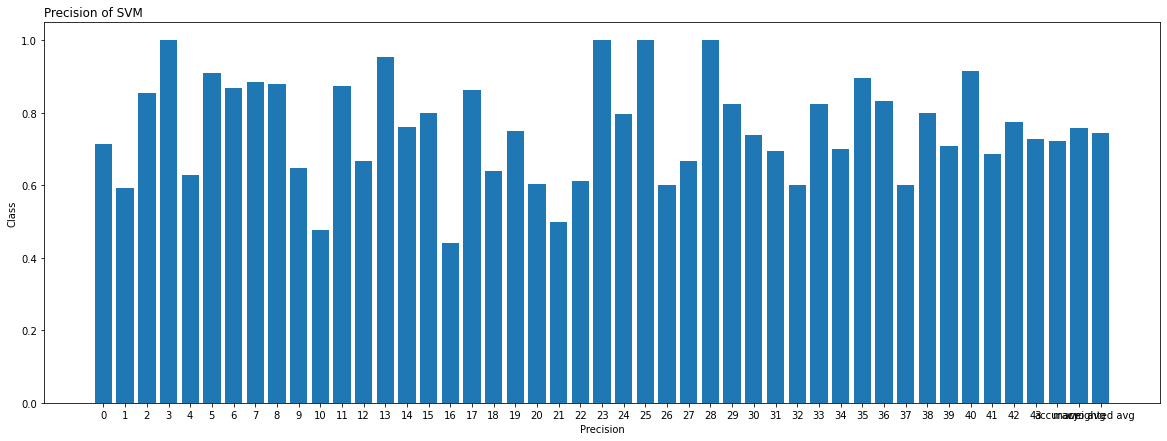

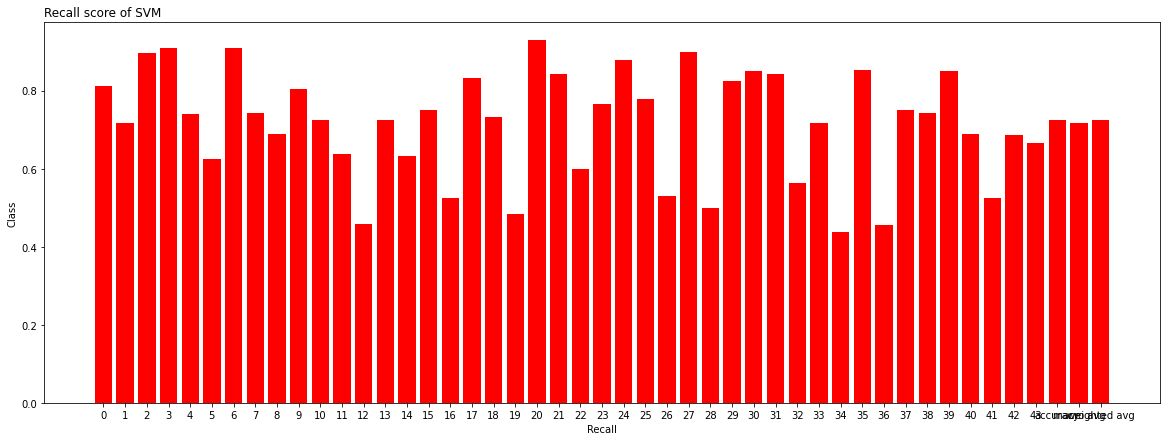

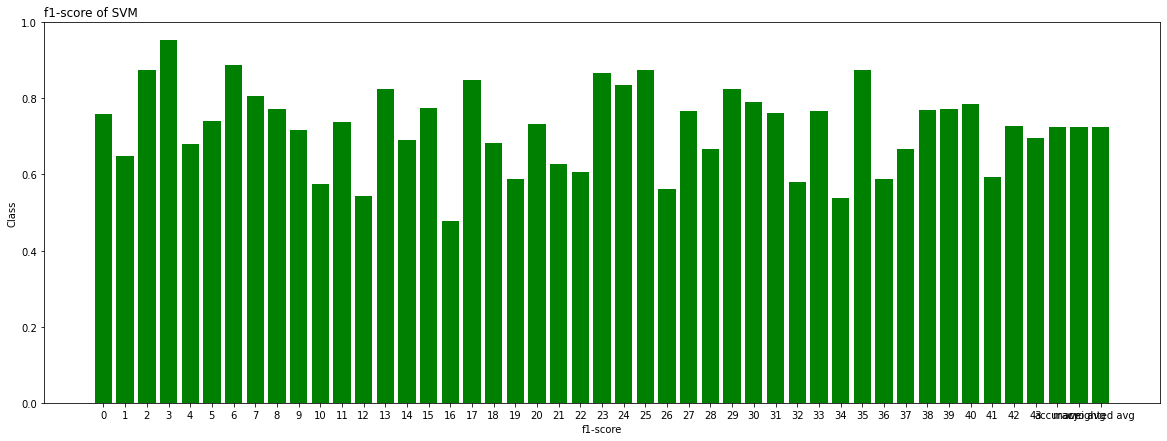

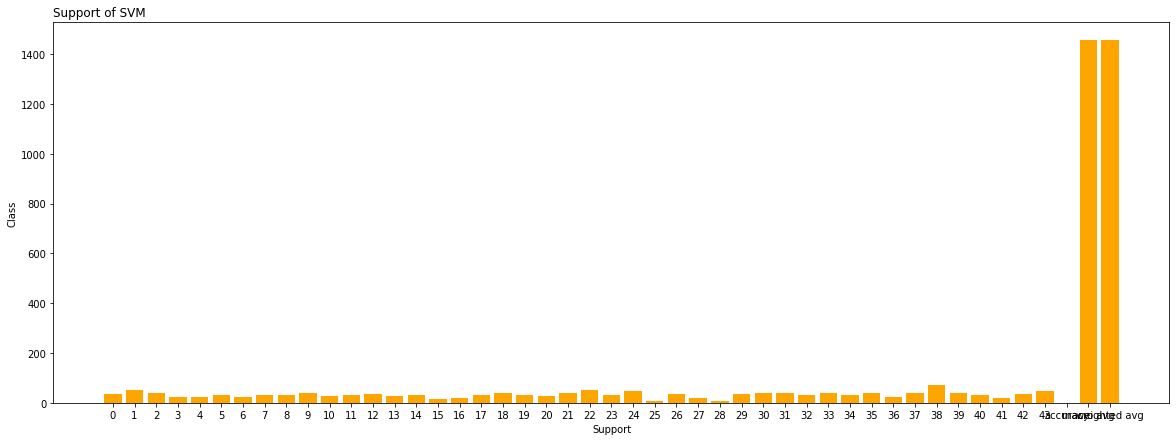

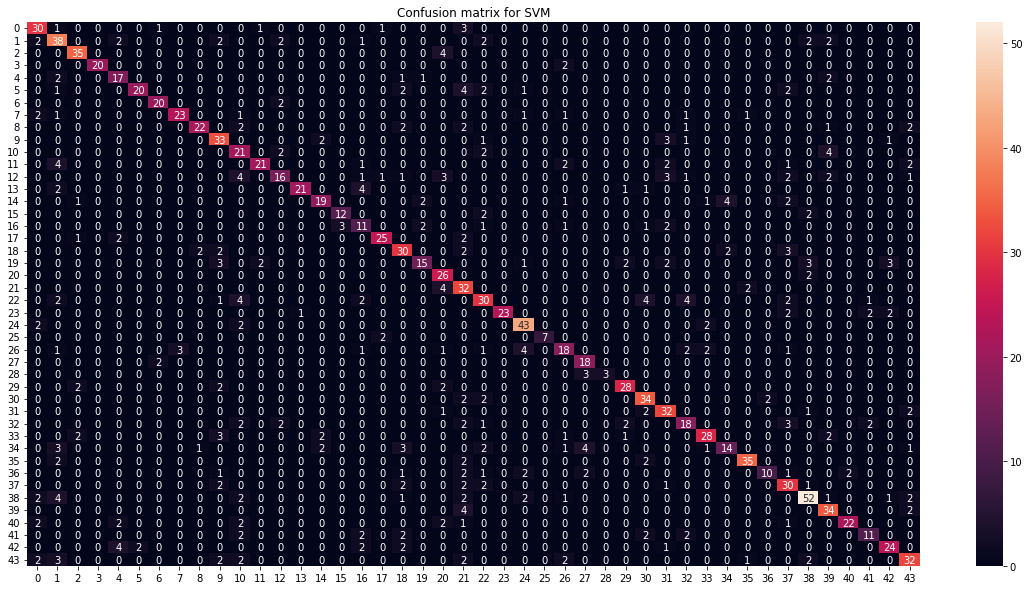

In [ ]:
report = classification_report(y_masked_test_np_SVM,y_masked_pred_SVM, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_svm, annot=True)
print()
print()
plt.show();

# Splitting, training and testing of unmasked-masked data

In [ ]:
#Training, splitting testing of masked-masked data

from sklearn.model_selection import train_test_split
X_unmasked_train_DT, X_unmasked_test_DT, y_unmasked_train_DT, y_unmasked_test_DT = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN, X_unmasked_test_KNN, y_unmasked_train_KNN, y_unmasked_test_KNN = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM, X_unmasked_test_SVM, y_unmasked_train_SVM, y_unmasked_test_SVM = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_RF, X_unmasked_test_RF, y_unmasked_train_RF, y_unmasked_test_RF = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_NB, X_unmasked_test_NB, y_unmasked_train_NB, y_unmasked_test_NB = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)

X_unmasked_train_DT_dum, X_unmasked_test_DT, y_unmasked_train_DT_dum, y_unmasked_test_DT = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN_dum, X_unmasked_test_KNN, y_unmasked_train_KNN_dum, y_unmasked_test_KNN = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM_dum, X_unmasked_test_SVM, y_unmasked_train_SVM_dum, y_unmasked_test_SVM = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_RF_dum, X_unmasked_test_RF, y_unmasked_train_RF_dum, y_unmasked_test_RF = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_NB_dum, X_unmasked_test_NB, y_unmasked_train_NB_dum, y_unmasked_test_NB = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_unmasked_train_DT, y_unmasked_train_DT)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_unmasked_train_KNN, y_unmasked_train_KNN)

#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_unmasked_train_SVM, y_unmasked_train_SVM)

#Naive Bayees
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_unmasked_train_NB = sc.fit_transform(X_unmasked_train_NB)
X_unmasked_test_NB = sc.transform(X_unmasked_test_NB)

from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_unmasked_train_NB, y_unmasked_train_NB)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_unmasked_train_RF, y_unmasked_train_RF)

#Predict Values
y_unmasked_pred_DT = classifier_DT.predict(X_unmasked_test_DT)
#y_test_DT = y_test_DT.tolist() 

y_unmasked_pred_SVM = classifier_SVM.predict(X_unmasked_test_SVM)
#y_test_SVM = y_test_SVM.tolist() 

y_unmasked_pred_RF = classifier_RF.predict(X_unmasked_test_RF)
#y_test_RF = y_test_RF.tolist() 

y_unmasked_pred_NB = classifier_NB.predict(X_unmasked_test_NB)
#y_test_NB = y_test_NB.tolist() 

y_unmasked_pred_KNN = classifier_KNN.predict(X_unmasked_test_KNN)
#y_test_KNN = y_test_KNN.tolist() 

y_unmasked_test_np_DT = np.asarray(y_unmasked_test_DT)
y_unmasked_test_np_SVM = np.asarray(y_unmasked_test_SVM)
y_unmasked_test_np_RF = np.asarray(y_unmasked_test_RF)
y_unmasked_test_np_KNN = np.asarray(y_unmasked_test_KNN)
y_unmasked_test_np_NB = np.asarray(y_unmasked_test_NB)


#Accuracy Calculation
# Accuracy
##############################################
disc_unmasked_NB = y_unmasked_test_np_NB - y_unmasked_pred_NB

count = 0
for i in disc_unmasked_NB:
  if i == 0:
    count += 1

accuracy_unmasked_NB = ( (100 * count) / len(y_unmasked_pred_NB))
##############################################
disc_unmasked_RF = y_unmasked_test_np_RF - y_unmasked_pred_RF

count = 0
for i in disc_unmasked_RF:
  if i == 0:
    count += 1

accuracy_unmasked_RF = ( (100 * count) / len(y_unmasked_pred_RF))
##############################################
disc_unmasked_KNN = y_unmasked_test_np_KNN - y_unmasked_pred_KNN

count = 0
for i in disc_unmasked_KNN:
  if i == 0:
    count += 1

accuracy_unmasked_KNN = ( (100 * count) / len(y_unmasked_pred_KNN))
##############################################
disc_unmasked_SVM = y_unmasked_test_np_SVM - y_unmasked_pred_SVM

count = 0
for i in disc_unmasked_SVM:
  if i == 0:
    count += 1

accuracy_unmasked_SVM = ( (100 * count) / len(y_unmasked_pred_SVM))
##############################################
disc_unmasked_DT = y_unmasked_test_np_DT - y_unmasked_pred_DT

count = 0
for i in disc_unmasked_DT:
  if i == 0:
    count += 1

accuracy_unmasked_DT = ( (100 * count) / len(y_unmasked_pred_DT))
##############################################

print(accuracy_unmasked_NB)
print(accuracy_unmasked_RF)
print(accuracy_unmasked_DT)
print(accuracy_unmasked_KNN)
print(accuracy_unmasked_SVM)

3.5051546391752577
3.161512027491409
1.8556701030927836
3.4364261168384878
5.085910652920962


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm_nb = confusion_matrix(y_unmasked_test_np_NB,y_unmasked_pred_NB)
cm_rf = confusion_matrix(y_unmasked_test_np_RF,y_unmasked_pred_RF)
cm_dt = confusion_matrix(y_unmasked_test_np_DT,y_unmasked_pred_DT)
cm_knn = confusion_matrix(y_unmasked_test_np_KNN,y_unmasked_pred_KNN)
cm_svm = confusion_matrix(y_unmasked_test_np_SVM,y_unmasked_pred_SVM)

#sns.heatmap(cm_dt, annot=True)
#print(classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT))

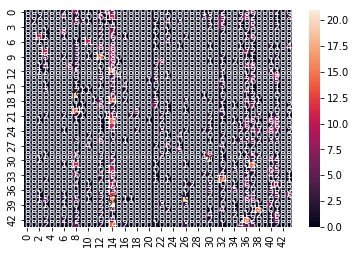

In [ ]:
sns.heatmap(cm_nb, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


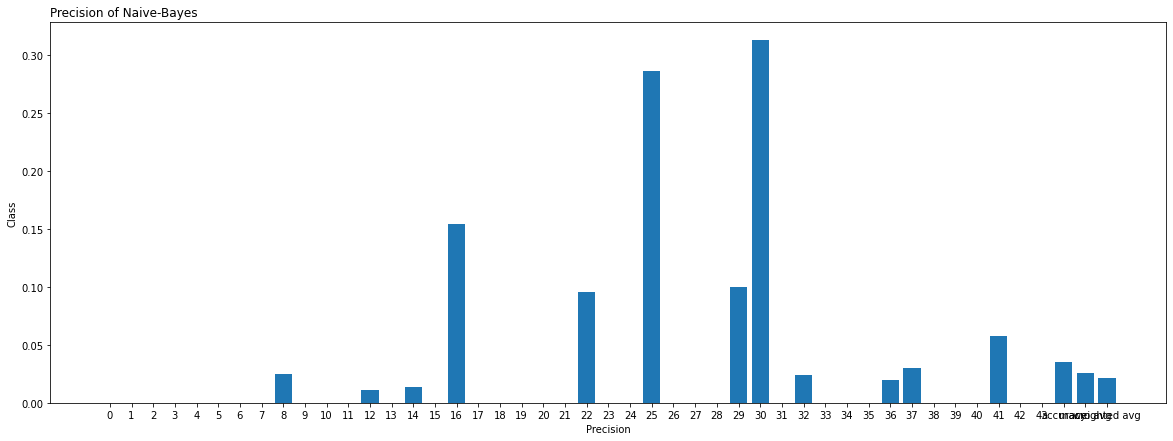

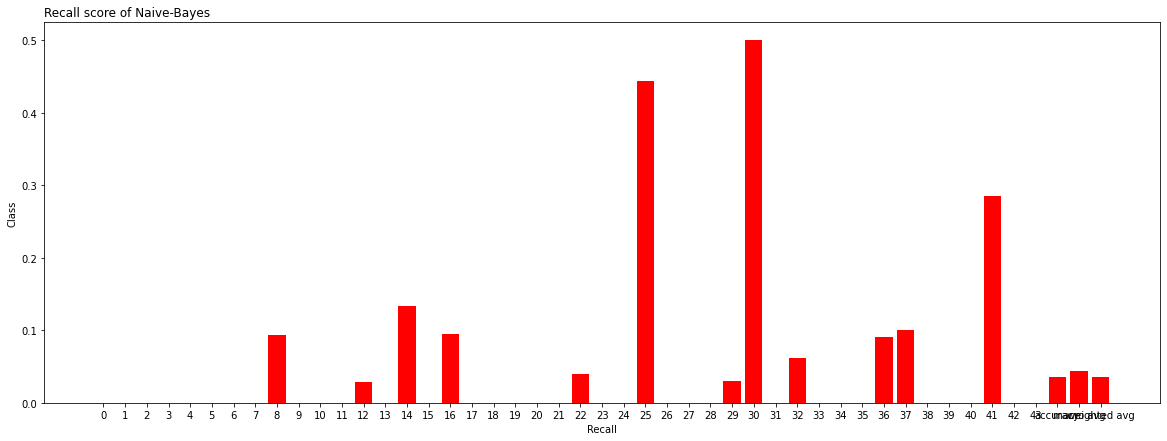

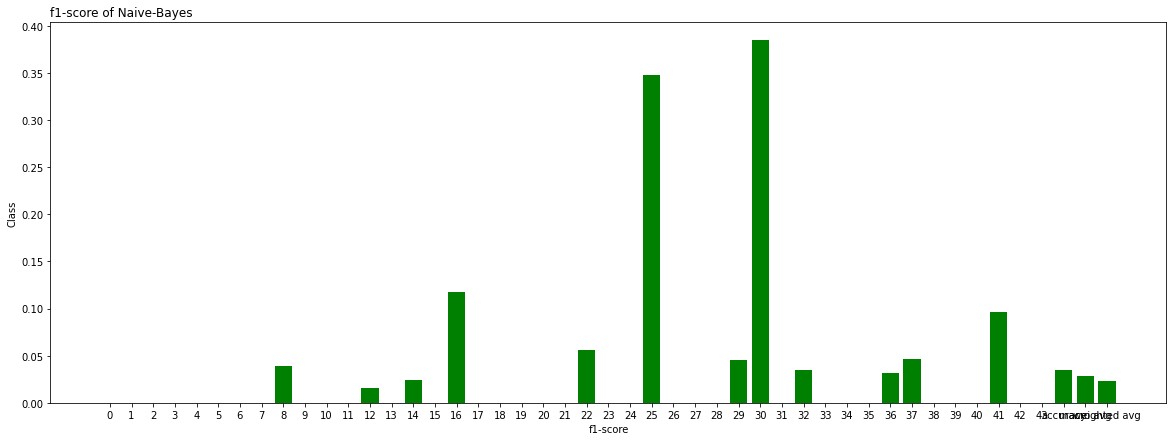

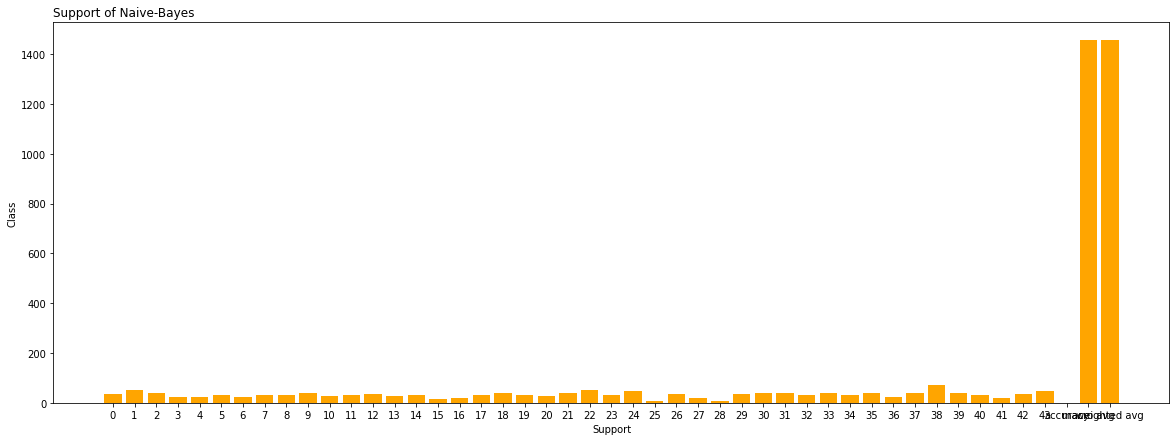

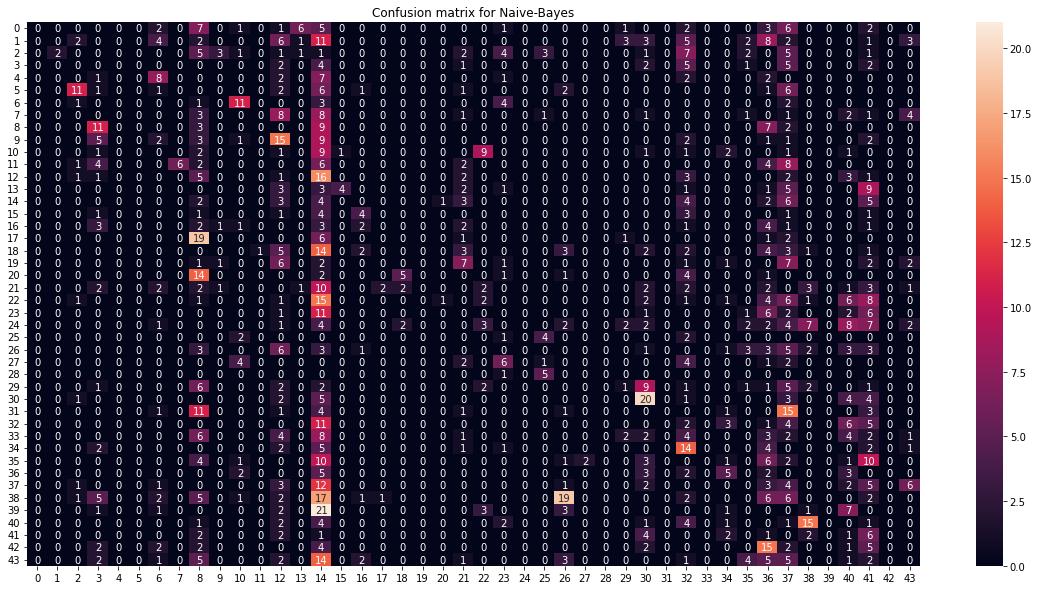

In [ ]:
report = classification_report(y_unmasked_test_np_NB,y_unmasked_pred_NB, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Decision tree
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Naive-Bayes", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Decision tree
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Naive-Bayes", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Naive-Bayes", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Naive-Bayes", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Naive-Bayes")
sns.heatmap(cm_nb, annot=True)
print()
print()
plt.show();

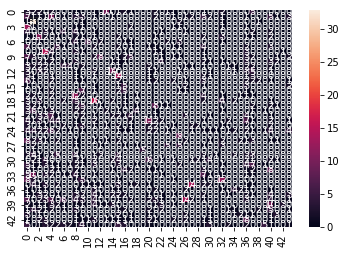

In [ ]:
sns.heatmap(cm_rf, annot=True)

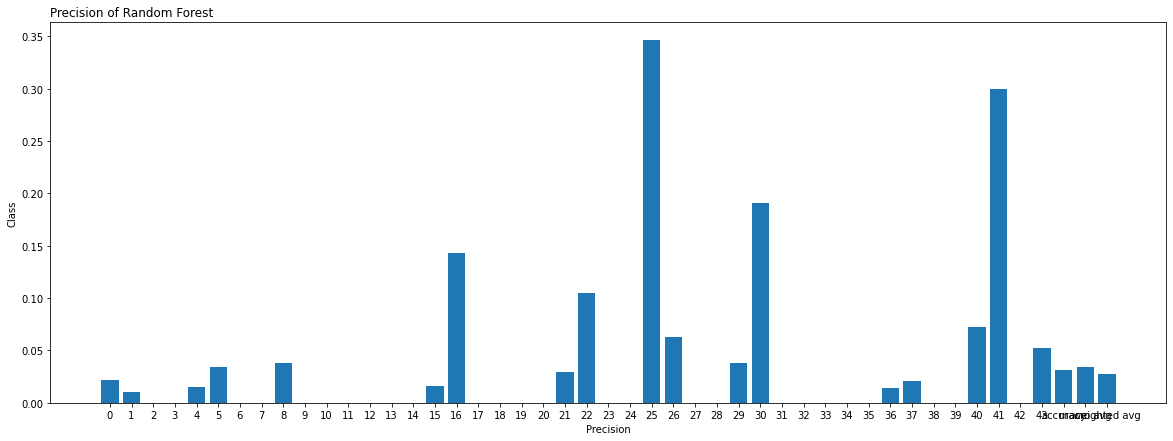

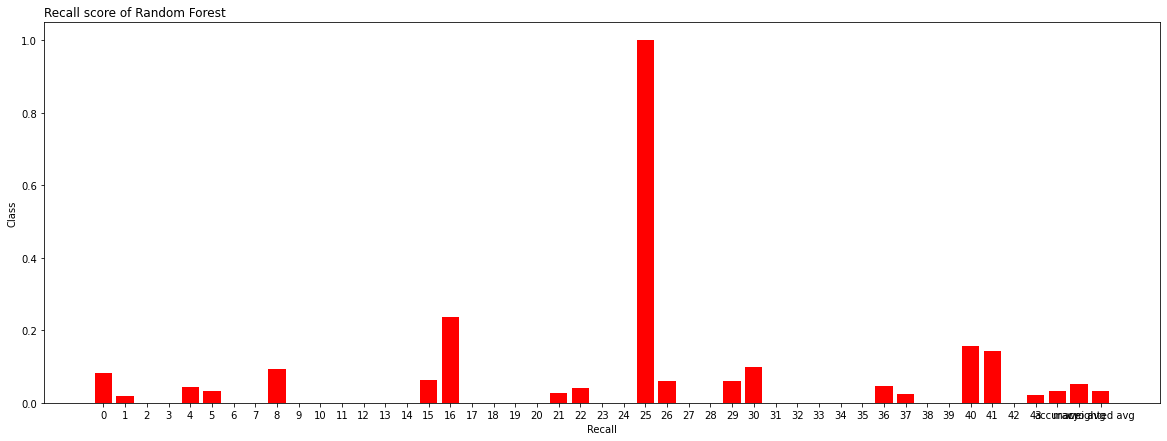

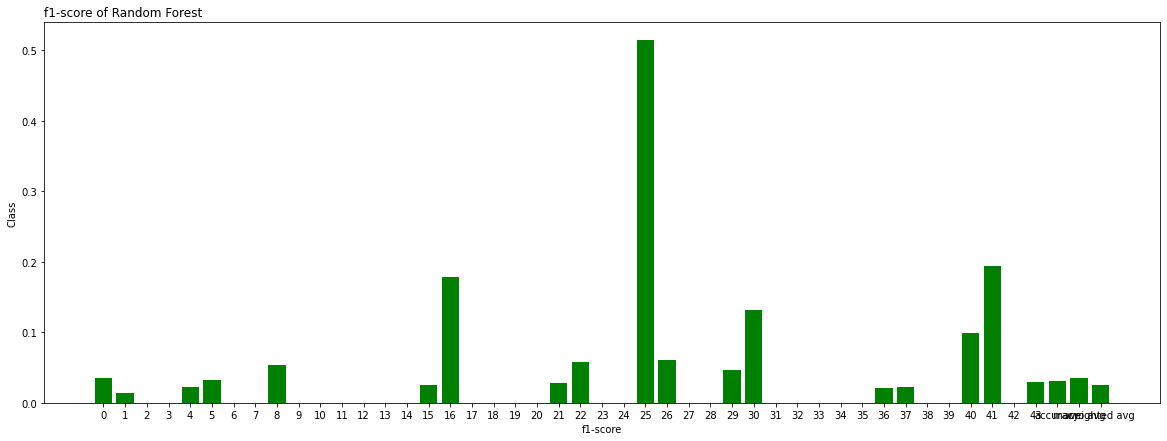

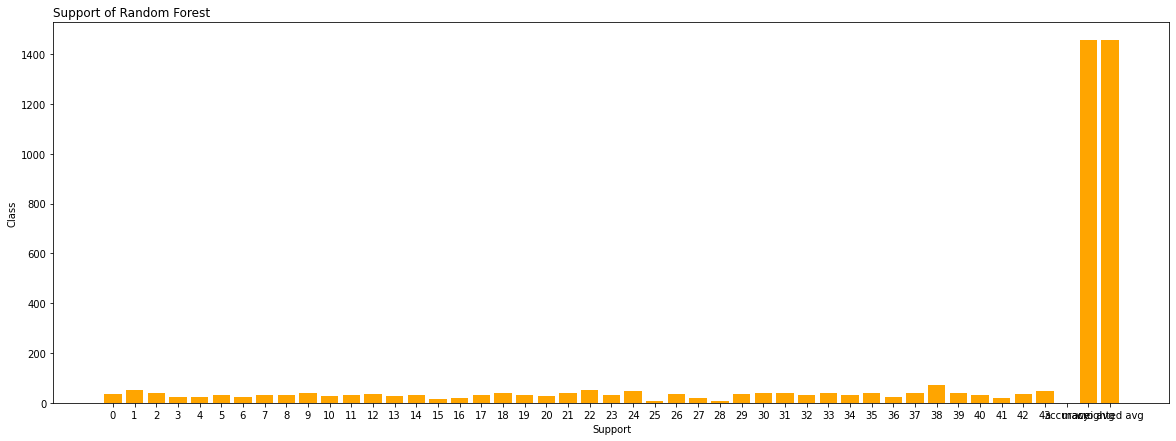

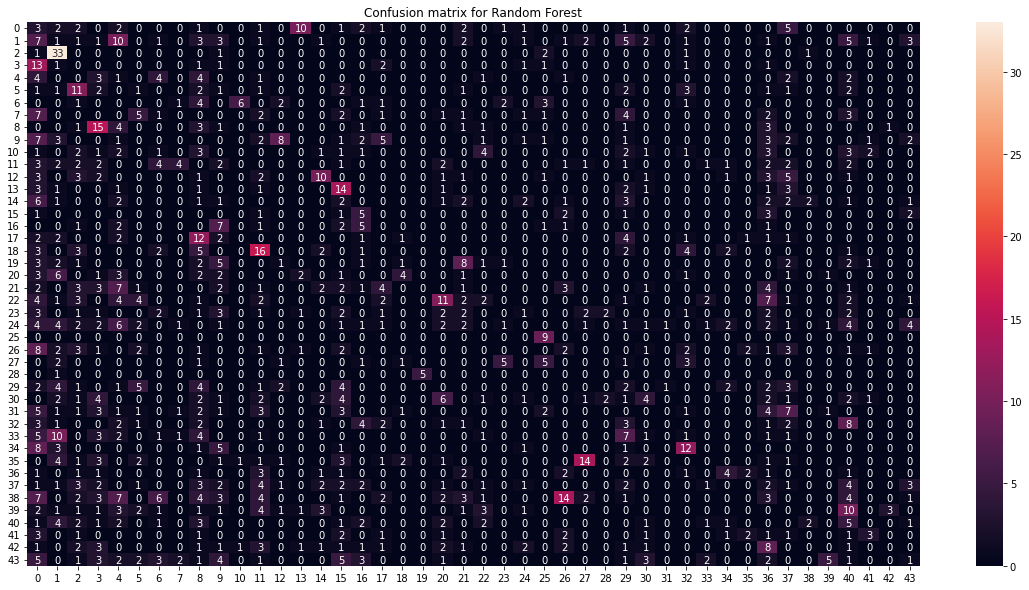

In [ ]:
report = classification_report(y_unmasked_test_np_RF,y_unmasked_pred_RF, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Random Forest", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Random Forest", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Random Forest", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Random Forest", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Random Forest")
sns.heatmap(cm_rf, annot=True)
print()
print()
plt.show();

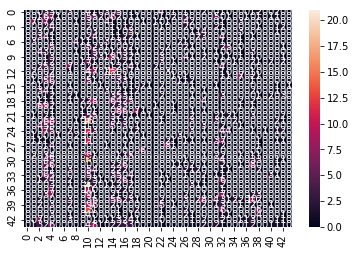

In [ ]:
sns.heatmap(cm_dt, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


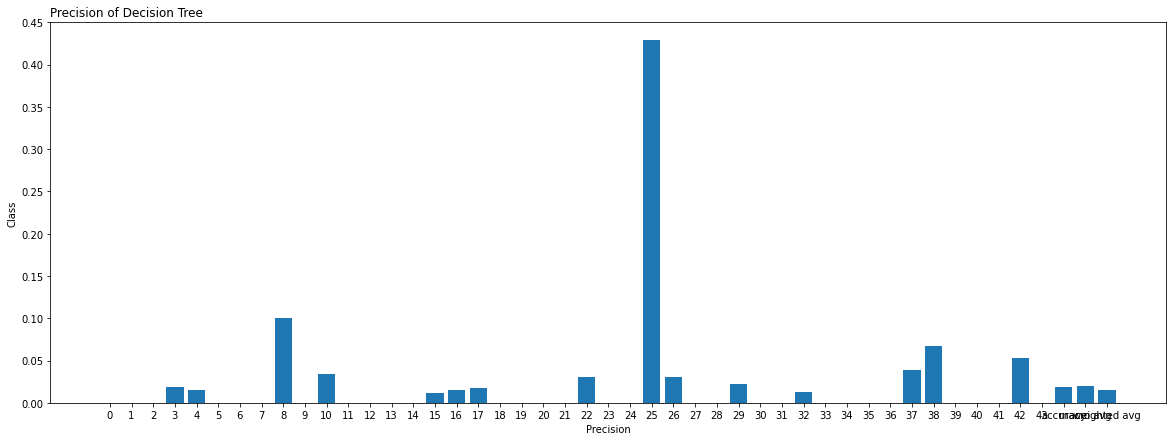

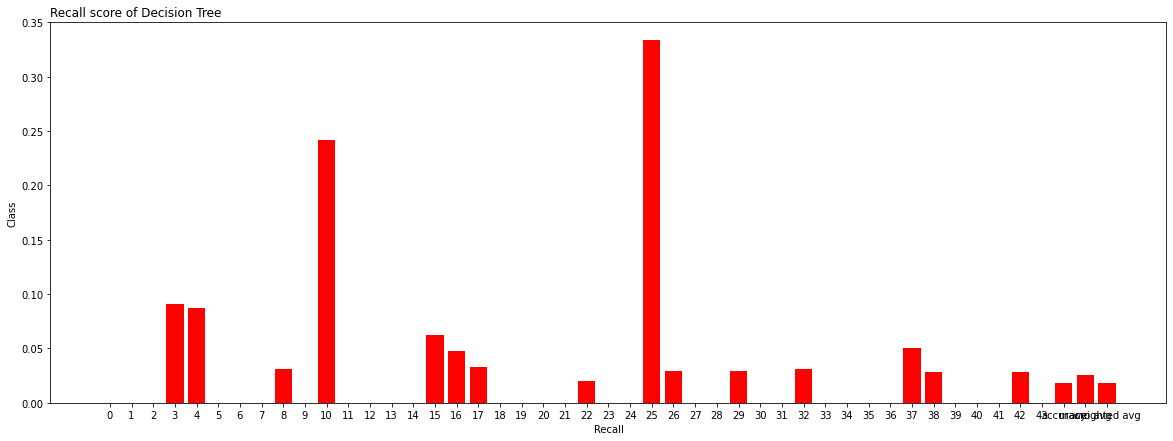

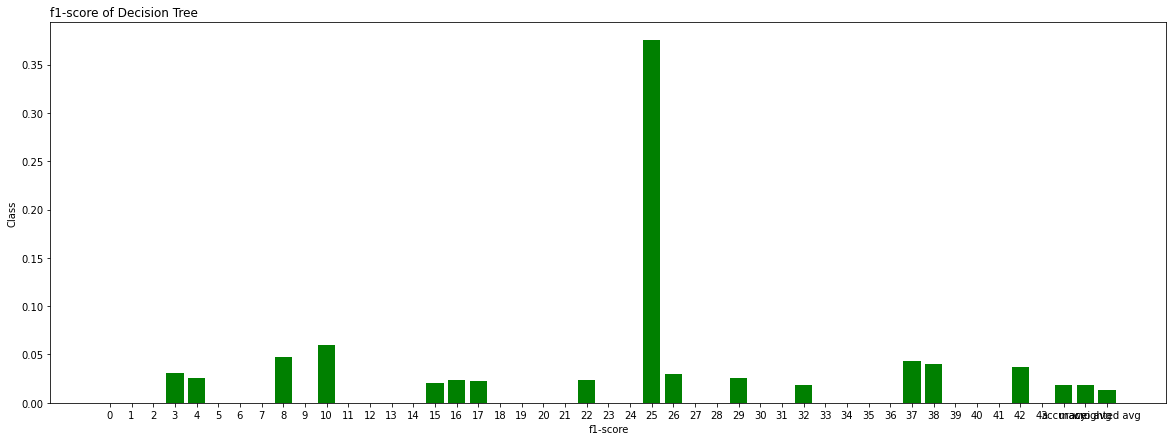

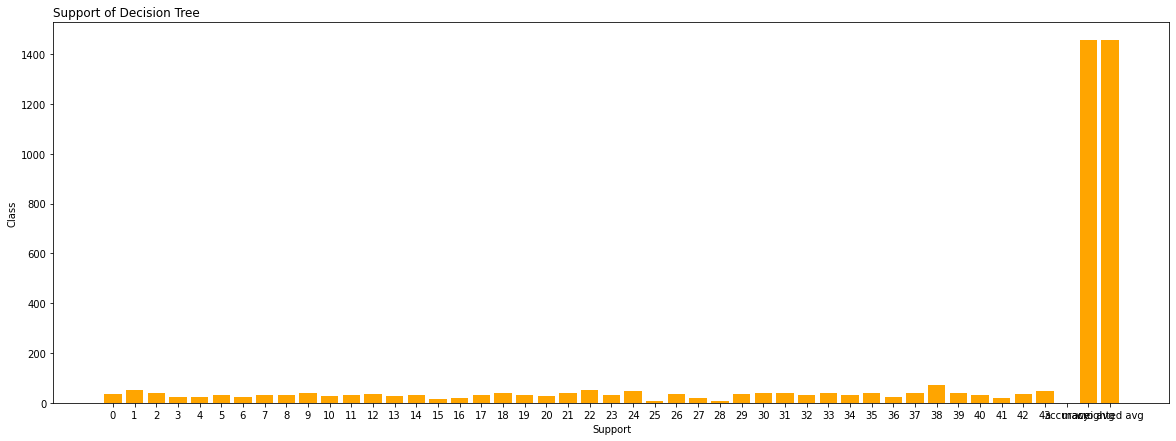

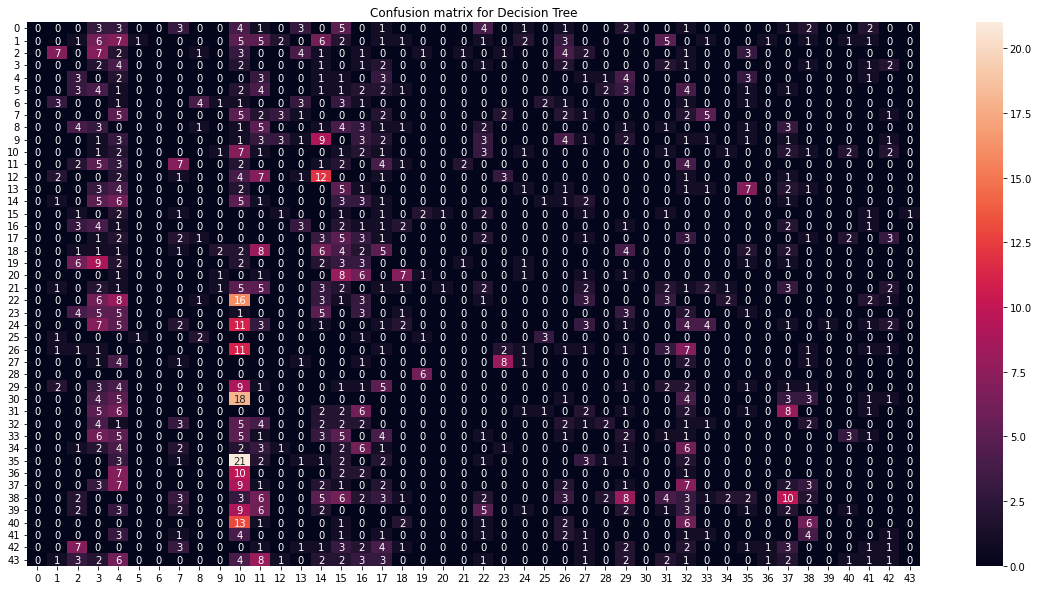

In [ ]:
report = classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Decision Tree", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Decision Tree", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Decision Tree", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Decision Tree", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Decision Tree")
sns.heatmap(cm_dt, annot=True)
print()
print()
plt.show();

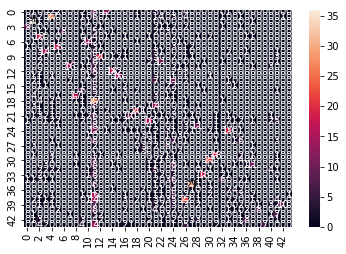

In [ ]:
sns.heatmap(cm_knn, annot=True)

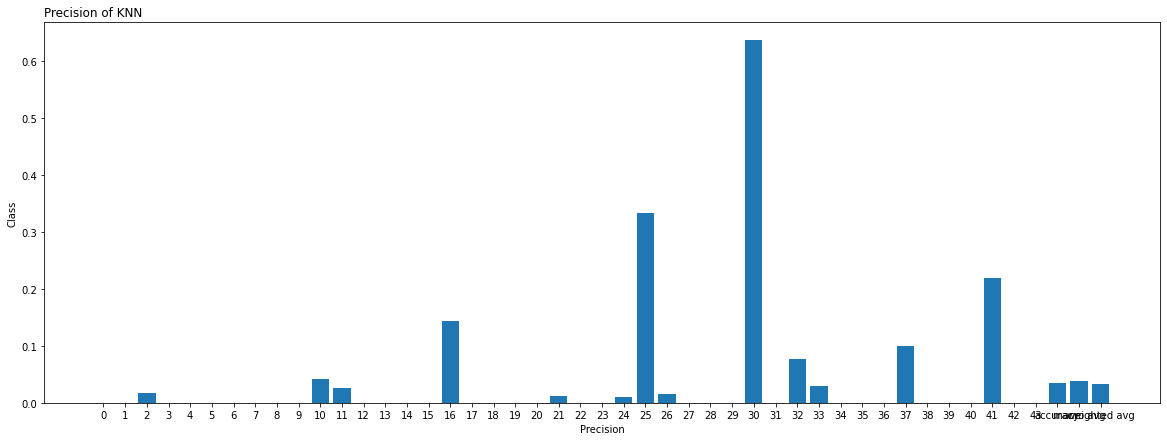

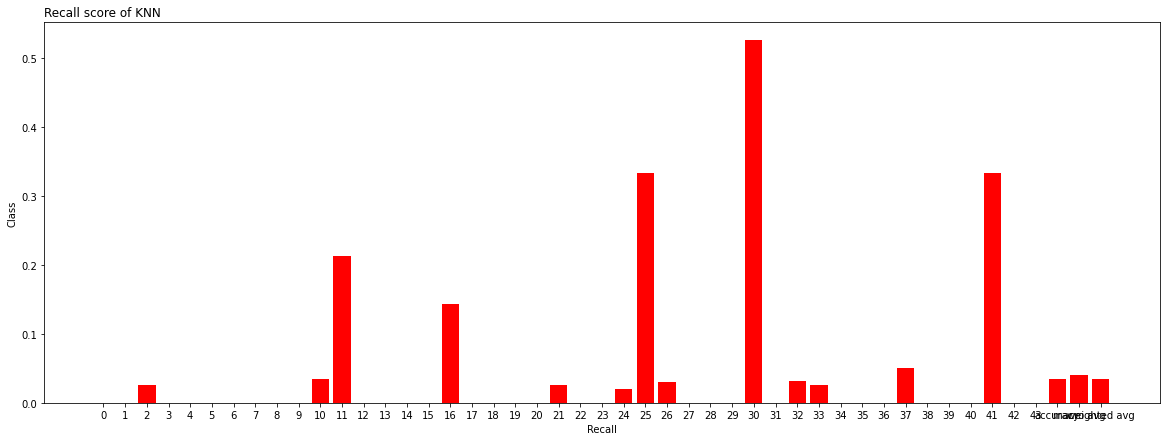

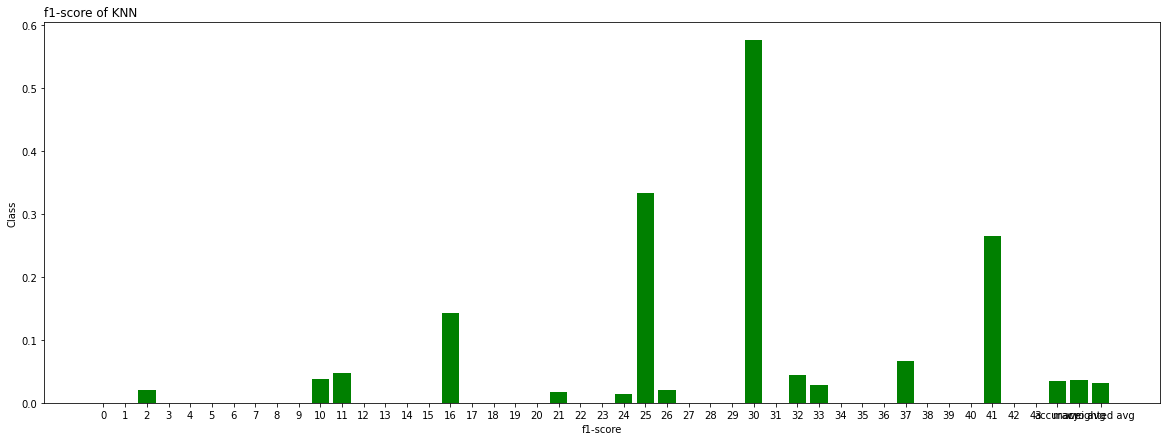

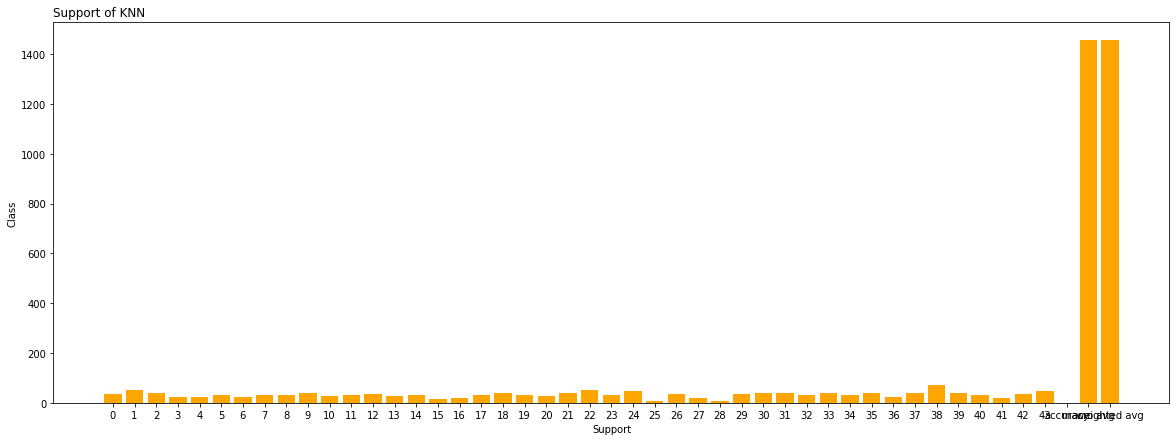

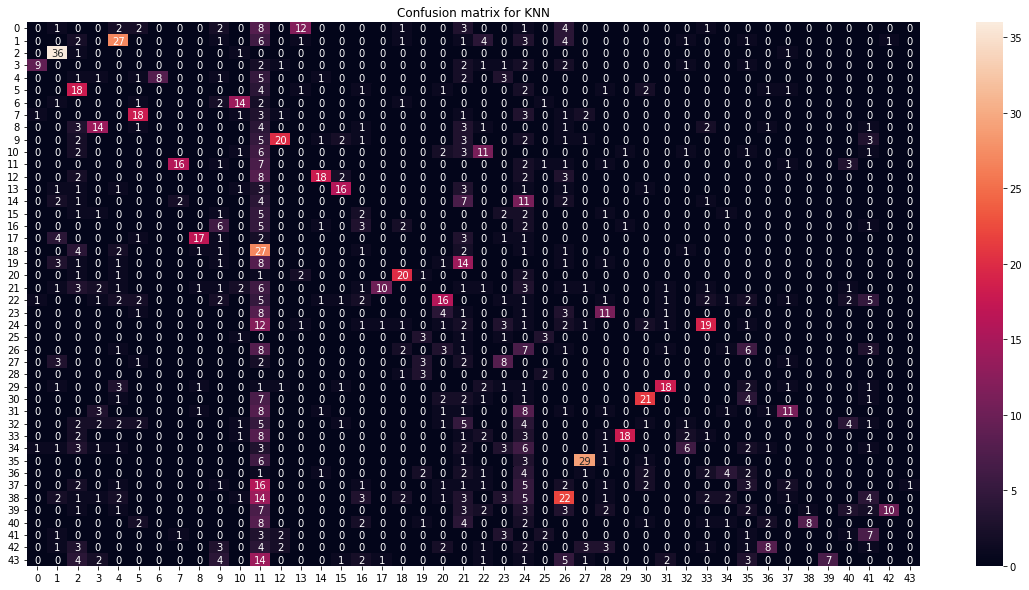

In [ ]:
report = classification_report(y_unmasked_test_np_KNN,y_unmasked_pred_KNN, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of KNN", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of KNN", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of KNN", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of KNN", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for KNN")
sns.heatmap(cm_knn, annot=True)
print()
print()
plt.show();

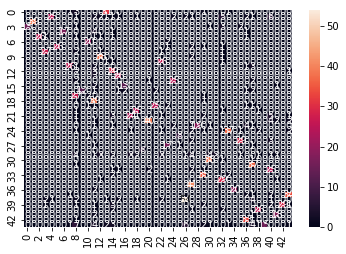

In [ ]:
sns.heatmap(cm_svm, annot=True)

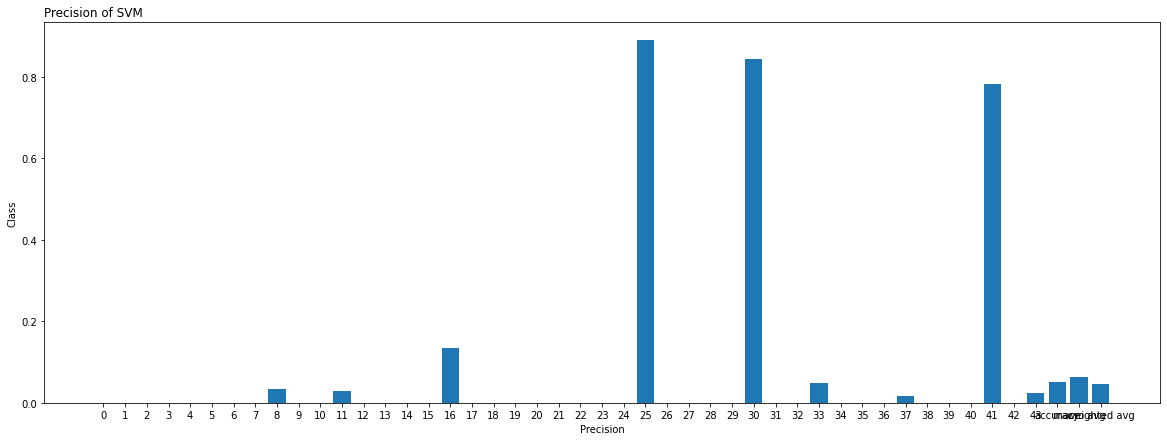

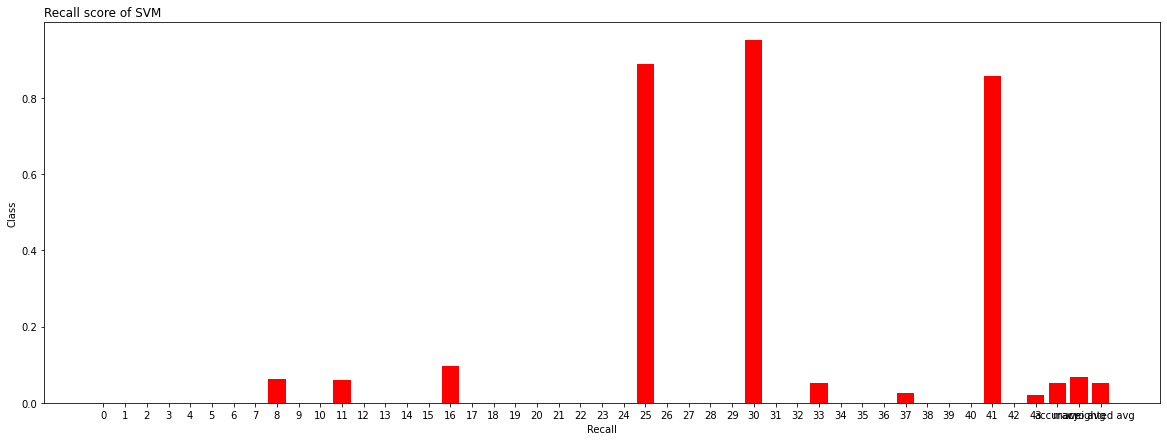

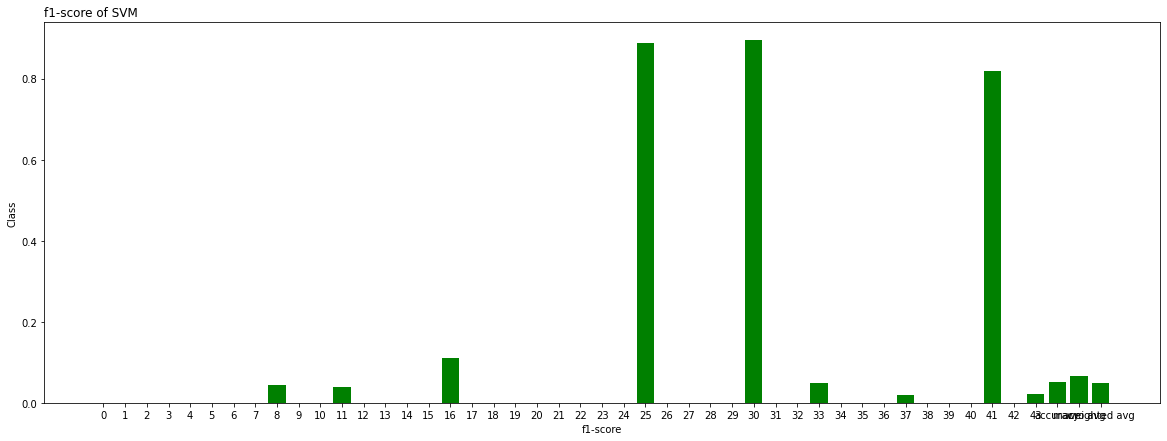

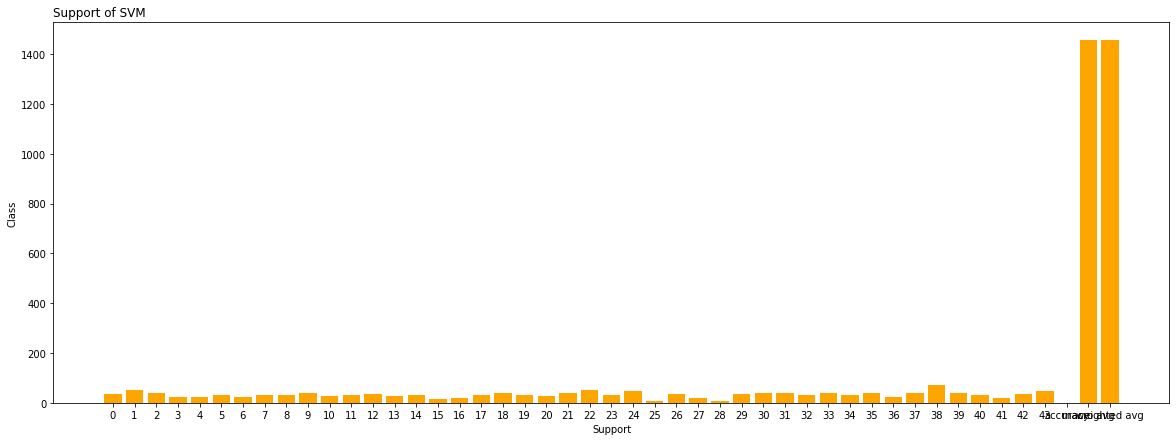

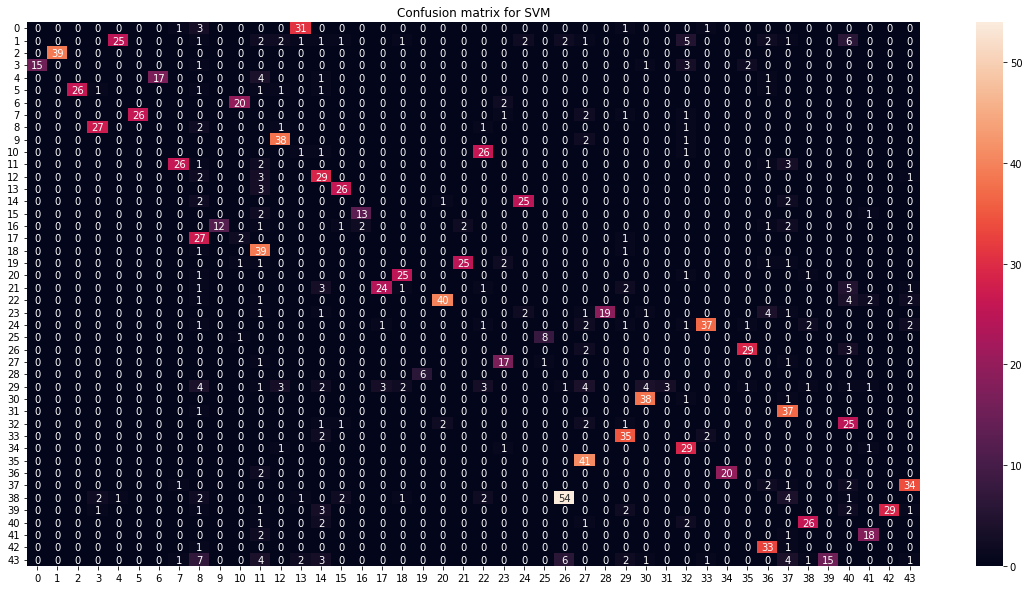

In [ ]:
report = classification_report(y_unmasked_test_np_SVM,y_unmasked_pred_SVM, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_svm, annot=True)
print()
print()
plt.show();

In [ ]:
len(X_unmasked_half)

3688

# Splitting, training and testing of masked-unmasked data

In [ ]:
#Training, splitting testing of masked-masked data

from sklearn.model_selection import train_test_split
X_unmasked_train_DT, X_unmasked_test_DT, y_unmasked_train_DT, y_unmasked_test_DT = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN, X_unmasked_test_KNN, y_unmasked_train_KNN, y_unmasked_test_KNN = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM, X_unmasked_test_SVM, y_unmasked_train_SVM, y_unmasked_test_SVM = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_RF, X_unmasked_test_RF, y_unmasked_train_RF, y_unmasked_test_RF = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)
X_unmasked_train_NB, X_unmasked_test_NB, y_unmasked_train_NB, y_unmasked_test_NB = train_test_split(X_masked, y_masked, test_size = 0.4, random_state = 0)

X_unmasked_train_DT_dum, X_unmasked_test_DT, y_unmasked_train_DT_dum, y_unmasked_test_DT = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN_dum, X_unmasked_test_KNN, y_unmasked_train_KNN_dum, y_unmasked_test_KNN = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM_dum, X_unmasked_test_SVM, y_unmasked_train_SVM_dum, y_unmasked_test_SVM = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_RF_dum, X_unmasked_test_RF, y_unmasked_train_RF_dum, y_unmasked_test_RF = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)
X_unmasked_train_NB_dum, X_unmasked_test_NB, y_unmasked_train_NB_dum, y_unmasked_test_NB = train_test_split(X_unmasked, y_unmasked, test_size = 0.4, random_state = 0)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_unmasked_train_DT, y_unmasked_train_DT)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_unmasked_train_KNN, y_unmasked_train_KNN)

#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_unmasked_train_SVM, y_unmasked_train_SVM)

#Naive Bayees
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_unmasked_train_NB = sc.fit_transform(X_unmasked_train_NB)
X_unmasked_test_NB = sc.transform(X_unmasked_test_NB)

from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_unmasked_train_NB, y_unmasked_train_NB)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_unmasked_train_RF, y_unmasked_train_RF)

#Predict Values
y_unmasked_pred_DT = classifier_DT.predict(X_unmasked_test_DT)
#y_test_DT = y_test_DT.tolist() 

y_unmasked_pred_SVM = classifier_SVM.predict(X_unmasked_test_SVM)
#y_test_SVM = y_test_SVM.tolist() 

y_unmasked_pred_RF = classifier_RF.predict(X_unmasked_test_RF)
#y_test_RF = y_test_RF.tolist() 

y_unmasked_pred_NB = classifier_NB.predict(X_unmasked_test_NB)
#y_test_NB = y_test_NB.tolist() 

y_unmasked_pred_KNN = classifier_KNN.predict(X_unmasked_test_KNN)
#y_test_KNN = y_test_KNN.tolist() 

y_unmasked_test_np_DT = np.asarray(y_unmasked_test_DT)
y_unmasked_test_np_SVM = np.asarray(y_unmasked_test_SVM)
y_unmasked_test_np_RF = np.asarray(y_unmasked_test_RF)
y_unmasked_test_np_KNN = np.asarray(y_unmasked_test_KNN)
y_unmasked_test_np_NB = np.asarray(y_unmasked_test_NB)


#Accuracy Calculation
# Accuracy
##############################################
disc_unmasked_NB = y_unmasked_test_np_NB - y_unmasked_pred_NB

count = 0
for i in disc_unmasked_NB:
  if i == 0:
    count += 1

accuracy_unmasked_NB = ( (100 * count) / len(y_unmasked_pred_NB))
##############################################
disc_unmasked_RF = y_unmasked_test_np_RF - y_unmasked_pred_RF

count = 0
for i in disc_unmasked_RF:
  if i == 0:
    count += 1

accuracy_unmasked_RF = ( (100 * count) / len(y_unmasked_pred_RF))
##############################################
disc_unmasked_KNN = y_unmasked_test_np_KNN - y_unmasked_pred_KNN

count = 0
for i in disc_unmasked_KNN:
  if i == 0:
    count += 1

accuracy_unmasked_KNN = ( (100 * count) / len(y_unmasked_pred_KNN))
##############################################
disc_unmasked_SVM = y_unmasked_test_np_SVM - y_unmasked_pred_SVM

count = 0
for i in disc_unmasked_SVM:
  if i == 0:
    count += 1

accuracy_unmasked_SVM = ( (100 * count) / len(y_unmasked_pred_SVM))
##############################################
disc_unmasked_DT = y_unmasked_test_np_DT - y_unmasked_pred_DT

count = 0
for i in disc_unmasked_DT:
  if i == 0:
    count += 1

accuracy_unmasked_DT = ( (100 * count) / len(y_unmasked_pred_DT))
##############################################

print(accuracy_unmasked_NB)
print(accuracy_unmasked_RF)
print(accuracy_unmasked_DT)
print(accuracy_unmasked_KNN)
print(accuracy_unmasked_SVM)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm_nb = confusion_matrix(y_unmasked_test_np_NB,y_unmasked_pred_NB)
cm_rf = confusion_matrix(y_unmasked_test_np_RF,y_unmasked_pred_RF)
cm_dt = confusion_matrix(y_unmasked_test_np_DT,y_unmasked_pred_DT)
cm_knn = confusion_matrix(y_unmasked_test_np_KNN,y_unmasked_pred_KNN)
cm_svm = confusion_matrix(y_unmasked_test_np_SVM,y_unmasked_pred_SVM)

#sns.heatmap(cm_dt, annot=True)
#print(classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT))

In [ ]:
sns.heatmap(cm_nb, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_NB,y_unmasked_pred_NB, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Decision tree
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Naive-Bayes", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Decision tree
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Naive-Bayes", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Naive-Bayes", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Naive-Bayes", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Naive-Bayes")
sns.heatmap(cm_nb, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_rf, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_RF,y_unmasked_pred_RF, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Random Forest", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Random Forest", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Random Forest", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Random Forest", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Random Forest")
sns.heatmap(cm_rf, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_dt, annot=True)

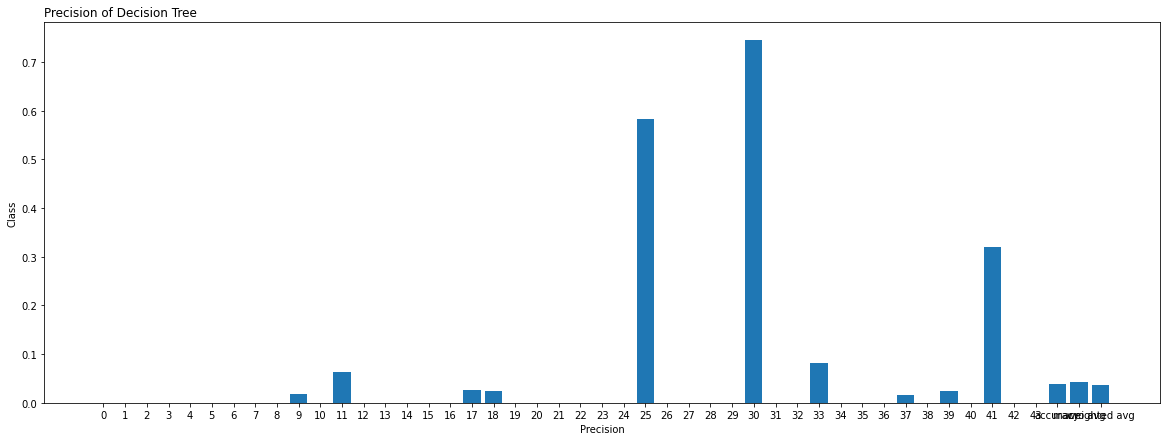

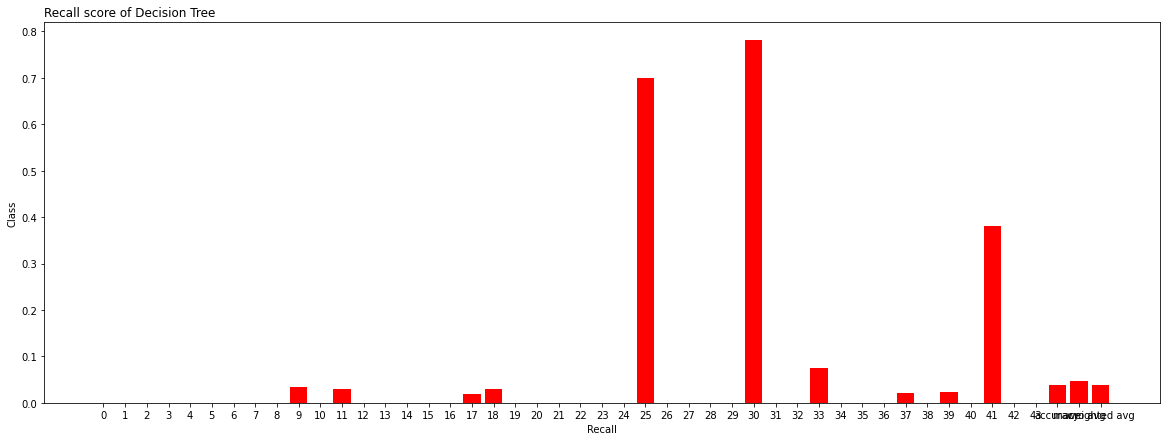

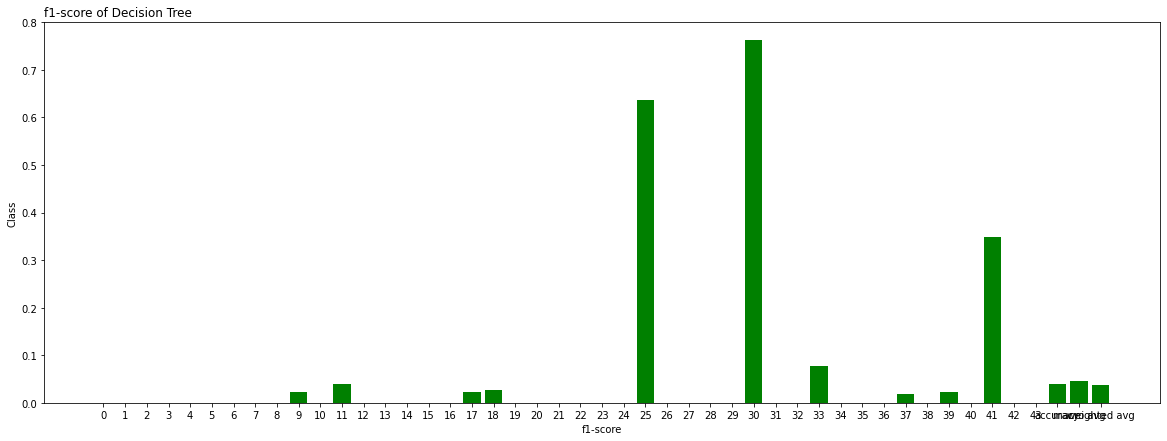

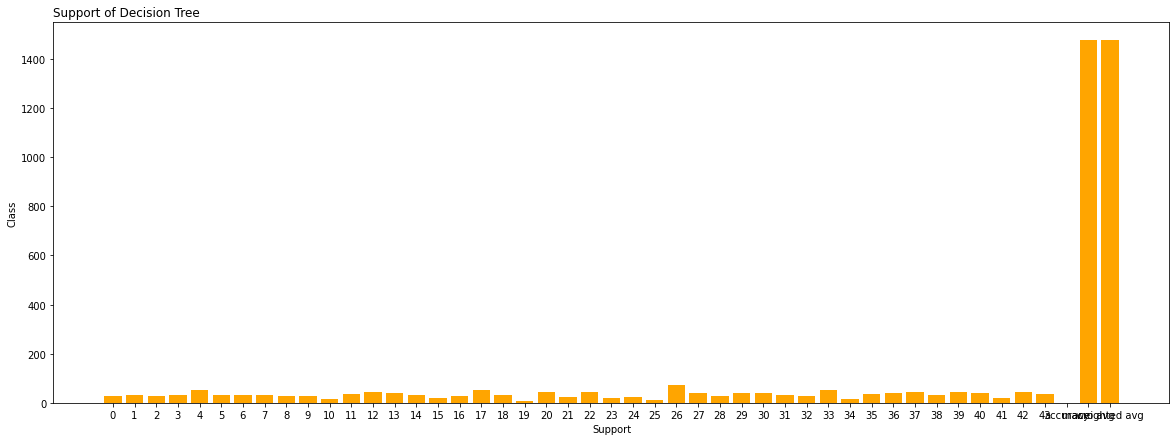

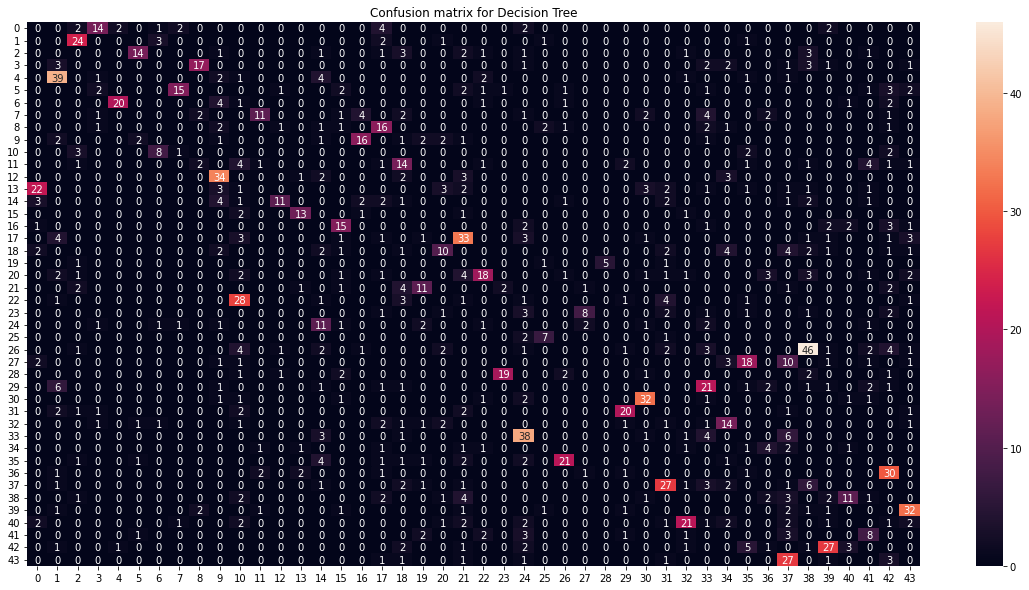

In [ ]:
report = classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of Decision Tree", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of Decision Tree", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of Decision Tree", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of Decision Tree", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for Decision Tree")
sns.heatmap(cm_dt, annot=True)
print()
print()
plt.show();

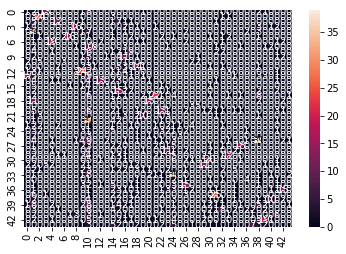

In [ ]:
sns.heatmap(cm_knn, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_KNN,y_unmasked_pred_KNN, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of KNN", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of KNN", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of KNN", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of KNN", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for KNN")
sns.heatmap(cm_knn, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_svm, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_SVM,y_unmasked_pred_SVM, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_svm, annot=True)
print()
print()
plt.show();

# Splitting, training and testing of unmasked-masked (Partial features)

In [ ]:
#Training, splitting testing of masked-masked data

from sklearn.model_selection import train_test_split
X_unmasked_train_DT, X_unmasked_test_DT, y_unmasked_train_DT, y_unmasked_test_DT = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN, X_unmasked_test_KNN, y_unmasked_train_KNN, y_unmasked_test_KNN = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM, X_unmasked_test_SVM, y_unmasked_train_SVM, y_unmasked_test_SVM = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_RF, X_unmasked_test_RF, y_unmasked_train_RF, y_unmasked_test_RF = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_NB, X_unmasked_test_NB, y_unmasked_train_NB, y_unmasked_test_NB = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)

X_unmasked_train_DT_dum, X_unmasked_test_DT, y_unmasked_train_DT_dum, y_unmasked_test_DT = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_KNN_dum, X_unmasked_test_KNN, y_unmasked_train_KNN_dum, y_unmasked_test_KNN = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_SVM_dum, X_unmasked_test_SVM, y_unmasked_train_SVM_dum, y_unmasked_test_SVM = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_RF_dum, X_unmasked_test_RF, y_unmasked_train_RF_dum, y_unmasked_test_RF = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)
X_unmasked_train_NB_dum, X_unmasked_test_NB, y_unmasked_train_NB_dum, y_unmasked_test_NB = train_test_split(X_unmasked_half, y_unmasked_half, test_size = 0.4, random_state = 0)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_unmasked_train_DT, y_unmasked_train_DT)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_unmasked_train_KNN, y_unmasked_train_KNN)

#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_unmasked_train_SVM, y_unmasked_train_SVM)

#Naive Bayees
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_unmasked_train_NB = sc.fit_transform(X_unmasked_train_NB)
X_unmasked_test_NB = sc.transform(X_unmasked_test_NB)

from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_unmasked_train_NB, y_unmasked_train_NB)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_unmasked_train_RF, y_unmasked_train_RF)

#Predict Values
y_unmasked_pred_DT = classifier_DT.predict(X_unmasked_test_DT)
#y_test_DT = y_test_DT.tolist() 

y_unmasked_pred_SVM = classifier_SVM.predict(X_unmasked_test_SVM)
#y_test_SVM = y_test_SVM.tolist() 

y_unmasked_pred_RF = classifier_RF.predict(X_unmasked_test_RF)
#y_test_RF = y_test_RF.tolist() 

y_unmasked_pred_NB = classifier_NB.predict(X_unmasked_test_NB)
#y_test_NB = y_test_NB.tolist() 

y_unmasked_pred_KNN = classifier_KNN.predict(X_unmasked_test_KNN)
#y_test_KNN = y_test_KNN.tolist() 

y_unmasked_test_np_DT = np.asarray(y_unmasked_test_DT)
y_unmasked_test_np_SVM = np.asarray(y_unmasked_test_SVM)
y_unmasked_test_np_RF = np.asarray(y_unmasked_test_RF)
y_unmasked_test_np_KNN = np.asarray(y_unmasked_test_KNN)
y_unmasked_test_np_NB = np.asarray(y_unmasked_test_NB)


#Accuracy Calculation
# Accuracy
##############################################
disc_unmasked_NB = y_unmasked_test_np_NB - y_unmasked_pred_NB

count = 0
for i in disc_unmasked_NB:
  if i == 0:
    count += 1

accuracy_unmasked_NB = ( (100 * count) / len(y_unmasked_pred_NB))
##############################################
disc_unmasked_RF = y_unmasked_test_np_RF - y_unmasked_pred_RF

count = 0
for i in disc_unmasked_RF:
  if i == 0:
    count += 1

accuracy_unmasked_RF = ( (100 * count) / len(y_unmasked_pred_RF))
##############################################
disc_unmasked_KNN = y_unmasked_test_np_KNN - y_unmasked_pred_KNN

count = 0
for i in disc_unmasked_KNN:
  if i == 0:
    count += 1

accuracy_unmasked_KNN = ( (100 * count) / len(y_unmasked_pred_KNN))
##############################################
disc_unmasked_SVM = y_unmasked_test_np_SVM - y_unmasked_pred_SVM

count = 0
for i in disc_unmasked_SVM:
  if i == 0:
    count += 1

accuracy_unmasked_SVM = ( (100 * count) / len(y_unmasked_pred_SVM))
##############################################
disc_unmasked_DT = y_unmasked_test_np_DT - y_unmasked_pred_DT

count = 0
for i in disc_unmasked_DT:
  if i == 0:
    count += 1

accuracy_unmasked_DT = ( (100 * count) / len(y_unmasked_pred_DT))
##############################################

print(accuracy_unmasked_NB)
print(accuracy_unmasked_RF)
print(accuracy_unmasked_DT)
print(accuracy_unmasked_KNN)
print(accuracy_unmasked_SVM)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm_nb = confusion_matrix(y_unmasked_test_np_NB,y_unmasked_pred_NB)
cm_rf = confusion_matrix(y_unmasked_test_np_RF,y_unmasked_pred_RF)
cm_dt = confusion_matrix(y_unmasked_test_np_DT,y_unmasked_pred_DT)
cm_knn = confusion_matrix(y_unmasked_test_np_KNN,y_unmasked_pred_KNN)
cm_svm = confusion_matrix(y_unmasked_test_np_SVM,y_unmasked_pred_SVM)

#sns.heatmap(cm_dt, annot=True)
#print(classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT))

# Splitting, training and testing of masked-unmasked data(Partial features)

In [ ]:
sns.heatmap(cm_nb, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_NB,y_unmasked_pred_NB, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_nb, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_rf, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_RF,y_unmasked_pred_RF, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_rf, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_dt, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision of SVM", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score of SVM", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score of SVM", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support of SVM", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix for SVM")
sns.heatmap(cm_dt, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_knn, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_KNN,y_unmasked_pred_KNN, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_knn, annot=True)
print()
print()
plt.show();

In [ ]:
sns.heatmap(cm_svm, annot=True)

In [ ]:
report = classification_report(y_unmasked_test_np_SVM,y_unmasked_pred_SVM, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_svm, annot=True)
print()
print()
plt.show();

In [ ]:
#Training, splitting testing of masked-masked data
from sklearn.model_selection import train_test_split
X_masked_train_DT, X_masked_test_DT, y_masked_train_DT, y_masked_test_DT = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_KNN, X_masked_test_KNN, y_masked_train_KNN, y_masked_test_KNN = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_SVM, X_masked_test_SVM, y_masked_train_SVM, y_masked_test_SVM = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_RF, X_masked_test_RF, y_masked_train_RF, y_masked_test_RF = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_NB, X_masked_test_NB, y_masked_train_NB, y_masked_test_NB = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)

X_masked_train_DT_dum, X_masked_test_DT, y_masked_train_DT_dum, y_masked_test_DT = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_KNN_dum, X_masked_test_KNN, y_masked_train_KNN_dum, y_masked_test_KNN = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_SVM_dum, X_masked_test_SVM, y_masked_train_SVM_dum, y_masked_test_SVM = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_RF_dum, X_masked_test_RF, y_masked_train_RF_dum, y_masked_test_RF = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)
X_masked_train_NB_dum, X_masked_test_NB, y_masked_train_NB_dum, y_masked_test_NB = train_test_split(X_masked_half, y_masked_half, test_size = 0.4, random_state = 0)


#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_masked_train_DT, y_masked_train_DT)

#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_masked_train_KNN, y_masked_train_KNN)

#SVM
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_masked_train_SVM, y_masked_train_SVM)

#Naive Bayees
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_masked_train_NB = sc.fit_transform(X_masked_train_NB)
X_masked_test_NB = sc.transform(X_masked_test_NB)

from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_masked_train_NB, y_masked_train_NB)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_masked_train_RF, y_masked_train_RF)

#Predict Values
y_masked_pred_DT = classifier_DT.predict(X_masked_test_DT)
#y_test_DT = y_test_DT.tolist() 

y_masked_pred_SVM = classifier_SVM.predict(X_masked_test_SVM)
#y_test_SVM = y_test_SVM.tolist() 

y_masked_pred_RF = classifier_RF.predict(X_masked_test_RF)
#y_test_RF = y_test_RF.tolist() 

y_masked_pred_NB = classifier_NB.predict(X_masked_test_NB)
#y_test_NB = y_test_NB.tolist() 

y_masked_pred_KNN = classifier_KNN.predict(X_masked_test_KNN)
#y_test_KNN = y_test_KNN.tolist() 

y_masked_test_np_DT = np.asarray(y_masked_test_DT)
y_masked_test_np_SVM = np.asarray(y_masked_test_SVM)
y_masked_test_np_RF = np.asarray(y_masked_test_RF)
y_masked_test_np_KNN = np.asarray(y_masked_test_KNN)
y_masked_test_np_NB = np.asarray(y_masked_test_NB)


#Accuracy Calculation
# Accuracy
##############################################
disc_masked_NB = y_masked_test_np_NB - y_masked_pred_NB

count = 0
for i in disc_unmasked_NB:
  if i == 0:
    count += 1

accuracy_masked_NB = ( (100 * count) / len(y_masked_pred_NB))
##############################################
disc_masked_RF = y_masked_test_np_RF - y_masked_pred_RF

count = 0
for i in disc_masked_RF:
  if i == 0:
    count += 1

accuracy_masked_RF = ( (100 * count) / len(y_masked_pred_RF))
##############################################
disc_masked_KNN = y_masked_test_np_KNN - y_masked_pred_KNN

count = 0
for i in disc_masked_KNN:
  if i == 0:
    count += 1

accuracy_masked_KNN = ( (100 * count) / len(y_masked_pred_KNN))
##############################################
disc_masked_SVM = y_masked_test_np_SVM - y_masked_pred_SVM

count = 0
for i in disc_masked_SVM:
  if i == 0:
    count += 1

accuracy_masked_SVM = ( (100 * count) / len(y_masked_pred_SVM))
##############################################
disc_masked_DT = y_masked_test_np_DT - y_masked_pred_DT

count = 0
for i in disc_masked_DT:
  if i == 0:
    count += 1

accuracy_masked_DT = ( (100 * count) / len(y_masked_pred_DT))
##############################################

print(accuracy_masked_NB)
print(accuracy_masked_RF)
print(accuracy_masked_DT)
print(accuracy_masked_KNN)
print(accuracy_masked_SVM)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
cm_nb = confusion_matrix(y_masked_test_np_NB,y_masked_pred_NB)
cm_rf = confusion_matrix(y_masked_test_np_RF,y_masked_pred_RF)
cm_dt = confusion_matrix(y_masked_test_np_DT,y_masked_pred_DT)
cm_knn = confusion_matrix(y_masked_test_np_KNN,y_masked_pred_KNN)
cm_svm = confusion_matrix(y_masked_test_np_SVM,y_masked_pred_SVM)

#sns.heatmap(cm_dt, annot=True)
#print(classification_report(y_unmasked_test_np_DT,y_unmasked_pred_DT))

In [ ]:
sns.heatmap(cm_nb, annot=True)

In [ ]:
report = classification_report(y_masked_test_np_NB,y_masked_pred_NB, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_nb, annot=True)
print()
print()
plt.show();

In [ ]:
report = classification_report(y_masked_test_np_RF,y_masked_pred_RF, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_rf, annot=True)
print()
print()
plt.show();

In [ ]:
report = classification_report(y_masked_test_np_DT,y_masked_pred_DT, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_dt, annot=True)
print()
print()
plt.show();

In [ ]:
report = classification_report(y_masked_test_np_KNN,y_masked_pred_KNN, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_knn, annot=True)
print()
print()
plt.show();

In [ ]:
report = classification_report(y_masked_test_SVM_NB,y_masked_pred_SVM, output_dict=True)
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(report).transpose()

#Precision bar-graph for Random Forest
x = df['precision']
y = df.index
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Precision", loc = 'left')
plt.xlabel("Precision")
plt.ylabel("Class")
plt.bar(y, x)
plt.show()

#Recall bar-graph for Random Forest
x = df['recall']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Recall score", loc = 'left')
plt.xlabel("Recall")
plt.ylabel("Class")
plt.bar(y, x, color=('red'))
plt.show()

#F1 score bar-graph for Decision tree
x = df['f1-score']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("f1-score", loc = 'left')
plt.xlabel("f1-score")
plt.ylabel("Class")
plt.bar(y, x, color=('green'))
plt.show()

x = df['support']
y = df.index 
# Figure Size
fig = plt.figure(figsize =(20, 7))
plt.title("Support", loc = 'left')
plt.xlabel("Support")
plt.ylabel("Class")
plt.bar(y, x, color=('orange'))
plt.show()

#Confusion matrix
plt.figure(figsize = (20,10))
plt.title("Confusion matrix")
sns.heatmap(cm_svm, annot=True)
print()
print()
plt.show();

#Extra

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        37
           1       0.56      0.66      0.61        53
           2       0.80      0.85      0.83        39
           3       0.62      0.82      0.71        22
           4       0.62      0.70      0.65        23
           5       0.69      0.56      0.62        32
           6       0.73      0.50      0.59        22
           7       0.50      0.61      0.55        31
           8       0.69      0.56      0.62        32
           9       0.78      0.71      0.74        41
          10       0.50      0.55      0.52        29
          11       0.70      0.48      0.57        33
          12       0.57      0.46      0.51        35
          13       0.75      0.62      0.68        29
          14       0.58      0.50      0.54        30
          15       0.52      0.75      0.62        16
          16       0.52      0.52      0.52        21
          17       0.67    

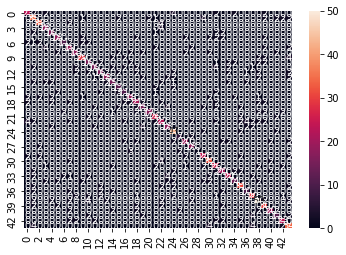

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_masked_test_np_DT,y_masked_pred_DT)

import seaborn as sns
sns.heatmap(cm, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_masked_test_np_DT,y_masked_pred_DT))

In [ ]:
print(cm)

[[23  2  0 ...  0  0  0]
 [ 0 35  0 ...  2  2  2]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  2]
 [ 0  0  0 ...  0 23  0]
 [ 0  4  0 ...  0  2 34]]


              precision    recall  f1-score   support

           0       0.66      0.62      0.64        37
           1       0.56      0.66      0.61        53
           2       0.80      0.85      0.83        39
           3       0.62      0.82      0.71        22
           4       0.62      0.70      0.65        23
           5       0.69      0.56      0.62        32
           6       0.73      0.50      0.59        22
           7       0.50      0.61      0.55        31
           8       0.69      0.56      0.62        32
           9       0.78      0.71      0.74        41
          10       0.50      0.55      0.52        29
          11       0.70      0.48      0.57        33
          12       0.57      0.46      0.51        35
          13       0.75      0.62      0.68        29
          14       0.58      0.50      0.54        30
          15       0.52      0.75      0.62        16
          16       0.52      0.52      0.52        21
          17       0.67    

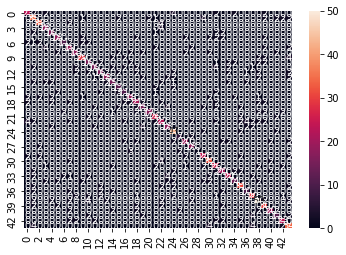

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_masked_test_np_DT,y_masked_pred_DT))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_masked_test_np_DT,y_masked_pred_DT))


              precision    recall  f1-score   support

           0       0.66      0.62      0.64        37
           1       0.56      0.66      0.61        53
           2       0.80      0.85      0.83        39
           3       0.62      0.82      0.71        22
           4       0.62      0.70      0.65        23
           5       0.69      0.56      0.62        32
           6       0.73      0.50      0.59        22
           7       0.50      0.61      0.55        31
           8       0.69      0.56      0.62        32
           9       0.78      0.71      0.74        41
          10       0.50      0.55      0.52        29
          11       0.70      0.48      0.57        33
          12       0.57      0.46      0.51        35
          13       0.75      0.62      0.68        29
          14       0.58      0.50      0.54        30
          15       0.52      0.75      0.62        16
          16       0.52      0.52      0.52        21
          17       0.67    